# Stroke Dataset Variables

## The Stroke dataset contains 5110 observations (rows) with 12 attributes (columns). Each datapoint corresponds to one patient, and the attributes are variables about the health status of each patient.

## There are categorical variables to be identified: id, gender, hypertension (yes/no), heart disease (yes/no), marital status, work type (children, government job, never worked, private, self-employer), residence type (urban, rural), smoking status (formerly smoked, never smoked, smokes), and stroke history.

## Also continuous features can be found: age, BMI and average glucose level.

## The aim of this project is to build a supervised binary classification model that is able to predict stroke using the predictors above as feature inputs.

## Building a model that successfully predicts stroke might be a useful tool for clinical diagnostics and e.g stroke units.

#A. Essential Data Pre-processing steps & feature distributions/visualizations

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Used to load CSV files
import pandas as pd
# Upload files from local hard-drive to colab
import io
from google.colab import files

# Automatically split  dataset
from sklearn.model_selection import train_test_split

# automatically standardize input data x
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Classifier modules from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Grid-search/Random-search and cross-validation modules:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


from scipy.stats import uniform

# metrics modules from scikit learn:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn import metrics

# used to produce ROC curves in multi-class settings
from sklearn.preprocessing import label_binarize
from collections import Counter

# Importing balanced learn for inbalanced data:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
! pip install -U imbalanced-learn




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [2]:
# Choose the Stroke dataset from my local drive
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Dataset_Stroke.csv']), delimiter=',')  # the dataset will be stored in a Pandas Dataframe

# Show type of variables in the dataframe
print(df.dtypes)

Saving Dataset_Stroke.csv to Dataset_Stroke.csv
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [3]:
# First glance over data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Check whether any missing values are present
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI has 201 missing values. These are going to be imputed later on.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Checking the shape of the data matrix. 5110 subjects, 12 columns (variables)
df.shape

(5110, 12)

In [7]:
# Checking whether duplicated rows need to be removed
df.duplicated().sum()

0

In [8]:
# Mean, standarddeviation, min max etc.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [9]:
df.describe(include="object").T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [10]:
# ID variable does not seem to add any value to the model. So it is dropped.
df.drop(['id'],
        axis=1,
        inplace=True) # I update the data here without creating a copy.

## Gender

In [11]:
# Check how many values gender has
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

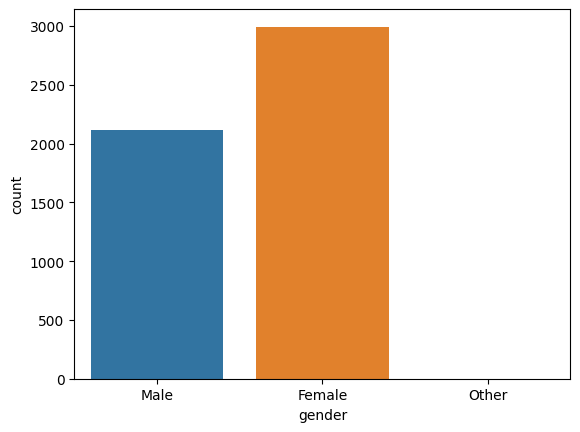

In [12]:
sns.countplot(data=df,x='gender')
# Helps to plot a count plot which will help us to see count of values in each unique category.


<Axes: xlabel='gender', ylabel='count'>

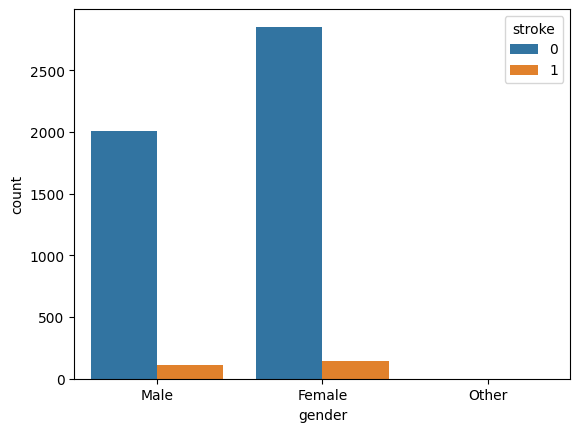

In [13]:
# How many females vs. males are diagnosed having stroke
sns.countplot(data=df,x='gender',hue='stroke')

In [14]:
# Removing the Other feature in gender.
# Find the 1 Other class
df.loc[df["gender"]=="Other"]
# Drop the Other subject
df.drop([3116], inplace=True)

There are 879 more females than males in our sample. So pretty much inbalanced. However, in both, males and females there one can observe that there are way more healthy cases than stroke diagnosed people. Which probably indicates a highly inbalanced dataset.

## Checking Age

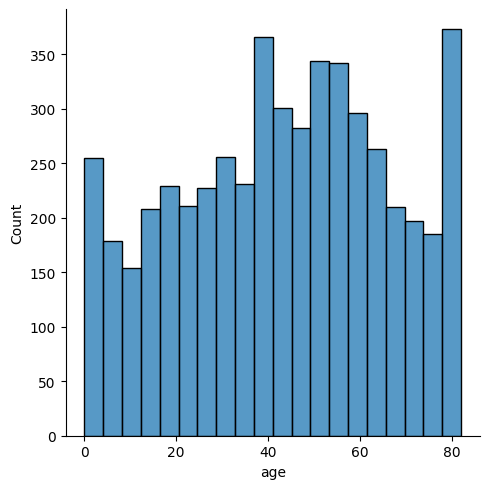

In [15]:
df['age'].nunique()
# Returns number of unique values in this attribute
sns.displot(df['age'])

<Axes: xlabel='stroke', ylabel='age'>

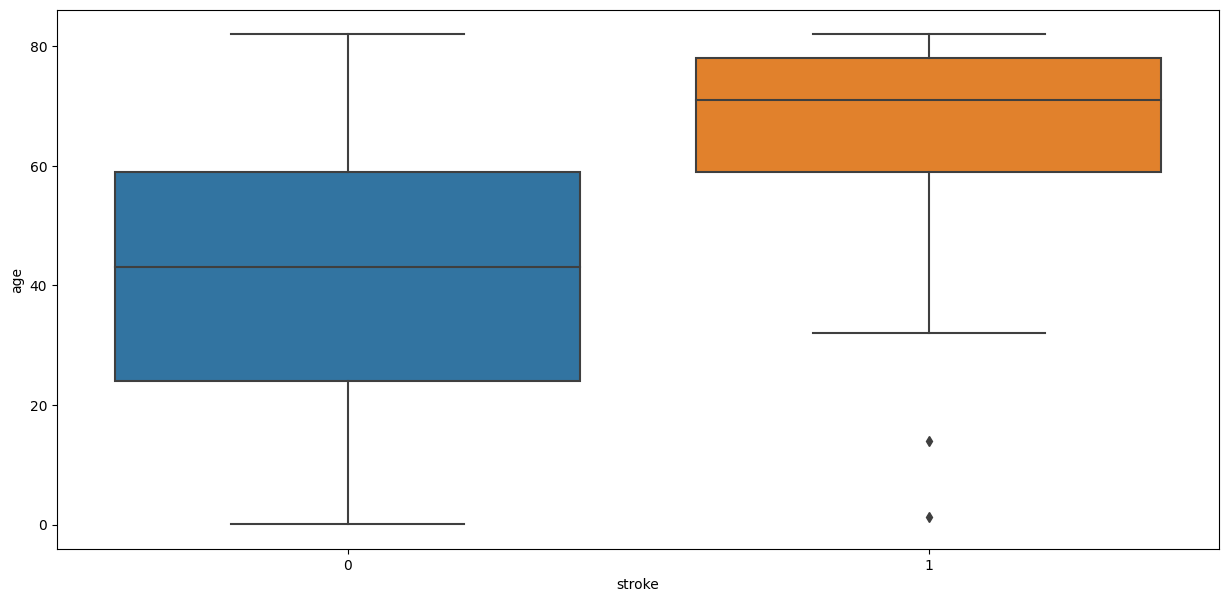

In [16]:
# This will plot a distribution plot of variable age
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='stroke',y='age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

Age is pretty much normally distributed with a slight overrepresentation of 80 years old people. The majority of cases that were diagnosed having stroke are above 60 years. With a few outliers even younger than 20

## Check Hypertension

<Axes: xlabel='hypertension', ylabel='count'>

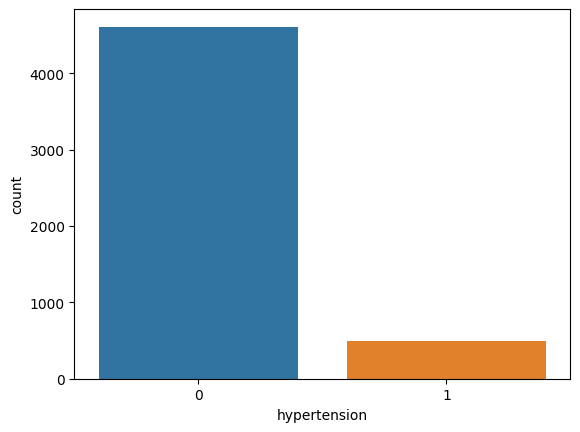

In [17]:
df['hypertension'].nunique()
# Returns number of unique values in this attribute
sns.countplot(data=df,x='hypertension')


<Axes: xlabel='hypertension', ylabel='count'>

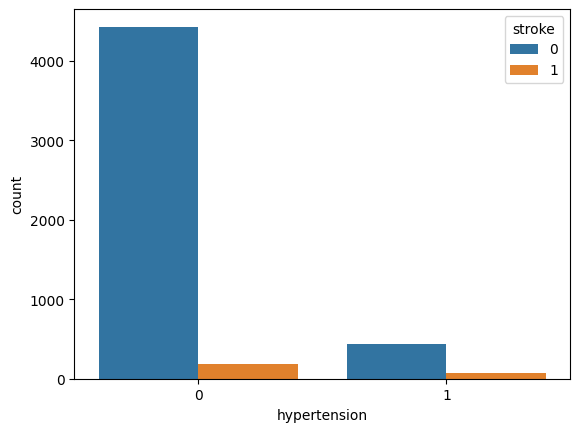

In [18]:
sns.countplot(data=df,x='hypertension',hue='stroke')

People having Hypertension seem to be highly underrepresented too. In both cases, hypertension or not, there are always fewer cases of stroke as compared to not having stroke.

## Heart Disease plots

In [19]:
print('Unique Value\n',df['heart_disease'].unique())
print('Value Counts\n',df['heart_disease'].value_counts())


# Above code will return unique value for heart disease attribute and its value counts


Unique Value
 [1 0]
Value Counts
 0    4833
1     276
Name: heart_disease, dtype: int64


<Axes: xlabel='heart_disease', ylabel='count'>

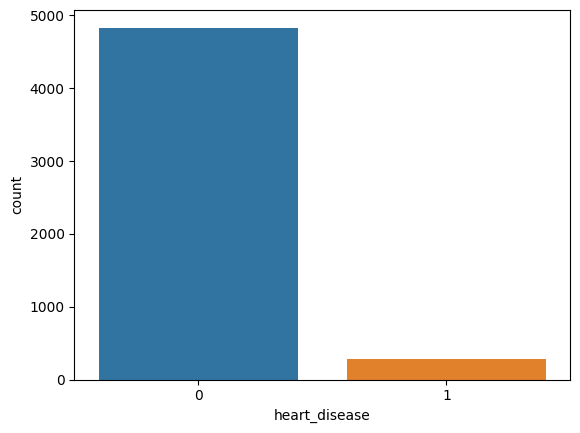

In [20]:
sns.countplot(data=df,x='heart_disease')
# Will plot a counter plot of variable heart diseases

<Axes: xlabel='heart_disease', ylabel='count'>

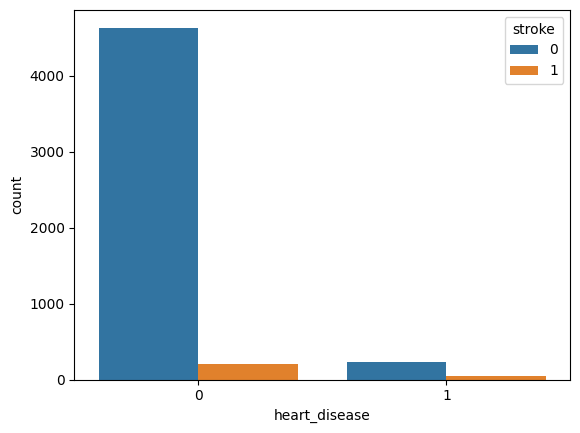

In [21]:
sns.countplot(data=df,x='heart_disease',hue='stroke')


Here again, way less people are found to have had a heart disease and healthy people seem to form the great majority of the sample.

## Ever Married Plots

Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1756
Name: ever_married, dtype: int64


<Axes: xlabel='ever_married', ylabel='count'>

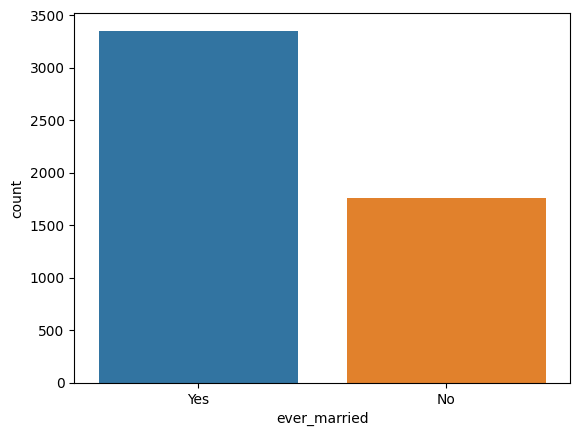

In [22]:
print('Unique Values\n',df['ever_married'].unique())
print('Value Counts\n',df['ever_married'].value_counts())
# Above code will show us number unique values of attribute and its count
sns.countplot(data=df,x='ever_married')


<Axes: xlabel='ever_married', ylabel='count'>

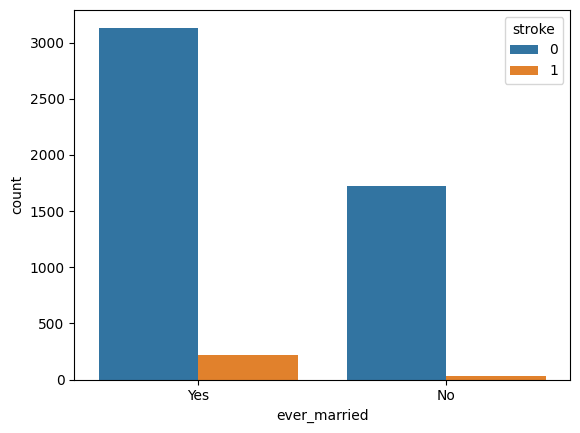

In [23]:
# Counter plot of ever married attribute
sns.countplot(data=df,x='ever_married',hue='stroke')
# Ever married with respect of stroke

There are also way more people ever being married as compared to not being married.

## Work Type

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<Axes: xlabel='work_type', ylabel='count'>

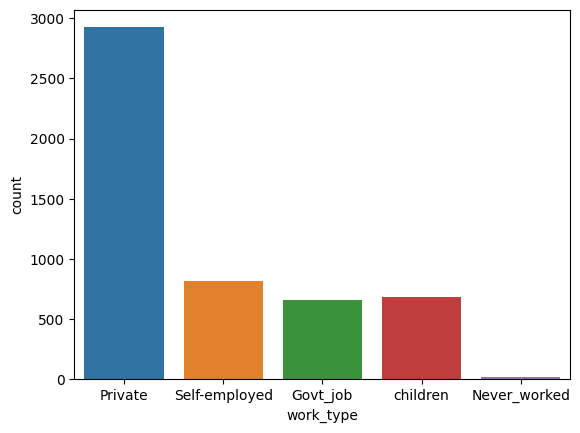

In [24]:
print('Unique Value\n',df['work_type'].unique())
print('Value Counts\n',df['work_type'].value_counts())
# Above code will return unique values of attributes and its count
sns.countplot(data=df,x='work_type')
# Above code will create a count plot

<Axes: xlabel='work_type', ylabel='count'>

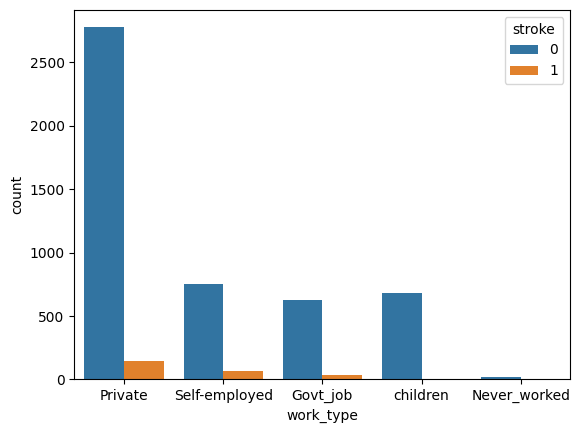

In [25]:
sns.countplot(data=df,x='work_type',hue='stroke')
# Above code will create a count plot with respect to stroke

Majority of the people work in the private sector. ONe might argue to see a trend that self-employed people seem to have higher rates of stroke as compared to people working with children. However, one should be cautios without using proper statistical testing.

## Residence Type

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


<Axes: xlabel='Residence_type', ylabel='count'>

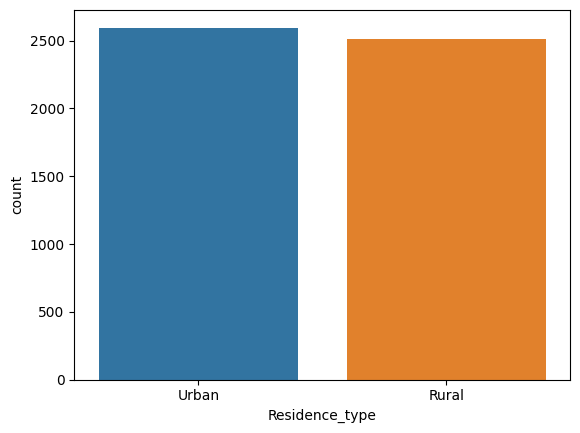

In [26]:
print('Unique Values\n',df['Residence_type'].unique())
print("Value Counts\n",df['Residence_type'].value_counts())
# Above code will return unique values of variable and its count
sns.countplot(data=df,x='Residence_type')
# This will create a counter plot

<Axes: xlabel='Residence_type', ylabel='count'>

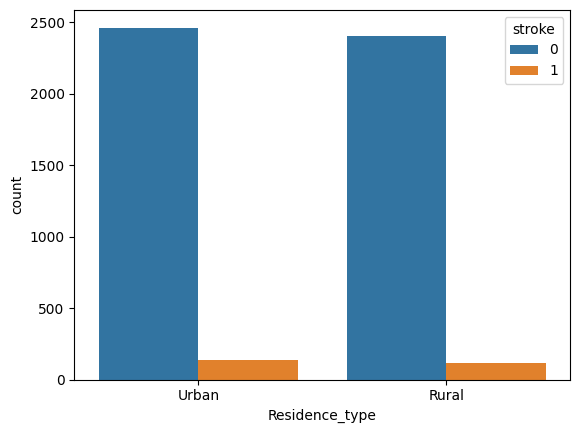

In [27]:
sns.countplot(data=df,x='Residence_type',hue='stroke')
# Residence Type with respect to stroke

There are almost an equal amount of people who live in a rural vs. an urban area.

## Average Glucose

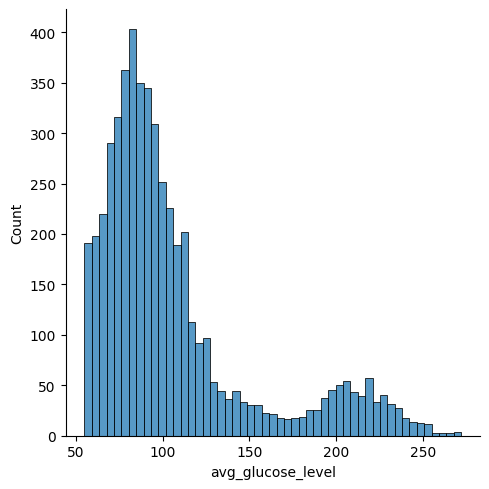

In [28]:
df['avg_glucose_level'].nunique()
# Number of unique values
sns.displot(df['avg_glucose_level'])
# Distribution of avg_glucose_level

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

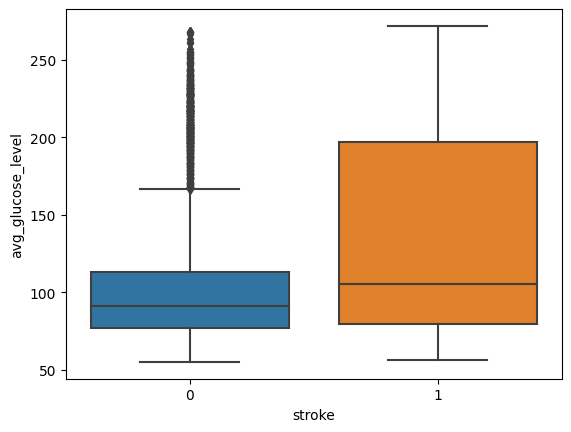

In [29]:
sns.boxplot(data=df,x='stroke',y='avg_glucose_level')
# Avg_glucose_level and Stroke

THere is a left skewed distribution for average glucose levels. There are more people having avg glucose levels around 100. MOreover increased glucose levels seem to be related to increased stroke counts as one can see in the boxplot.

## Smoking Status

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


<Axes: xlabel='smoking_status', ylabel='count'>

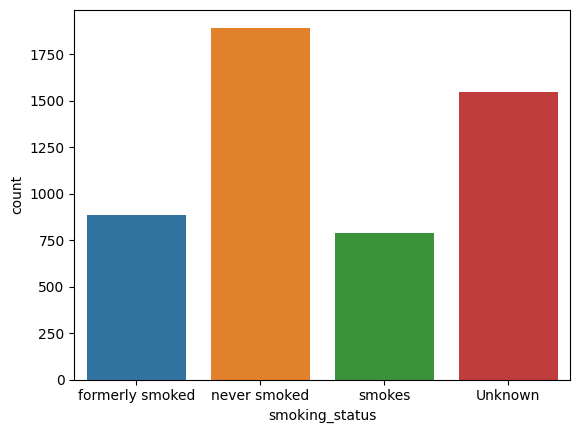

In [30]:
print('Unique Values\n',df['smoking_status'].unique())
print('Value Counts\n',df['smoking_status'].value_counts())
# Returns unique values and its count
sns.countplot(data=df,x='smoking_status')
# Count plot of smoking status

<Axes: xlabel='smoking_status', ylabel='count'>

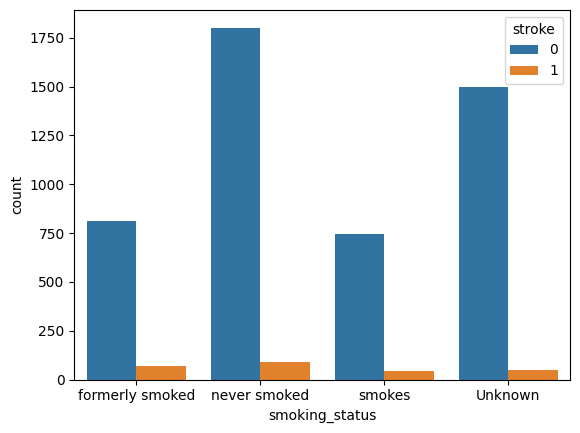

In [31]:
sns.countplot(data=df,x='smoking_status',hue='stroke')
# Smoking Status with respect to Stroke

The smoking variable seems to be very noisy, because there are many participants that did not tell, or did not know their smoking status. ONe might decide to remove the examples that didn't know their status, however in that case I will keep it, because for too many people the status was unknown. There might still be some merit for training the model

## Check BMI

In [32]:
# I need to get rid of the NaN values: One possibility is to replace them with the
# mean of the attribute:
mean_value=df['bmi'].mean()

# According to Prof. Testolin we can replace missing values with the mean.
# Here I use pandas inbuilt function to replace missing values with BMI mean
df['bmi'].fillna(value=mean_value, inplace=True)

# BMI should be rounded to 1 decimal place (according to convention)
df.bmi = df.bmi.round(1)

# Check updated dataframe
print(df[0:11])

    gender   age  hypertension  heart_disease ever_married      work_type  \
0     Male  67.0             0              1          Yes        Private   
1   Female  61.0             0              0          Yes  Self-employed   
2     Male  80.0             0              1          Yes        Private   
3   Female  49.0             0              0          Yes        Private   
4   Female  79.0             1              0          Yes  Self-employed   
5     Male  81.0             0              0          Yes        Private   
6     Male  74.0             1              1          Yes        Private   
7   Female  69.0             0              0           No        Private   
8   Female  59.0             0              0          Yes        Private   
9   Female  78.0             0              0          Yes        Private   
10  Female  81.0             1              0          Yes        Private   

   Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0    

In [33]:
df.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

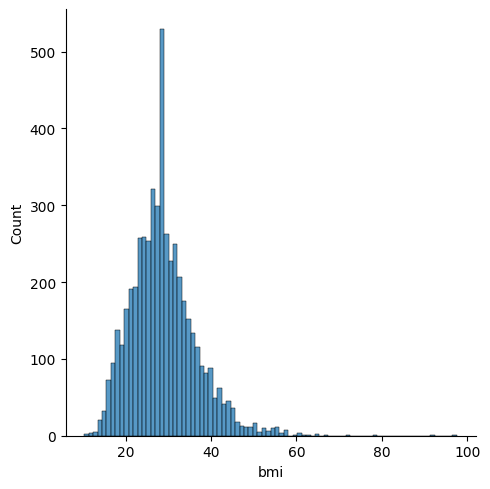

In [34]:
df['bmi'].nunique()
# Number of unique values
sns.displot(df['bmi'])
# Distribution of bmi

<Axes: xlabel='stroke', ylabel='bmi'>

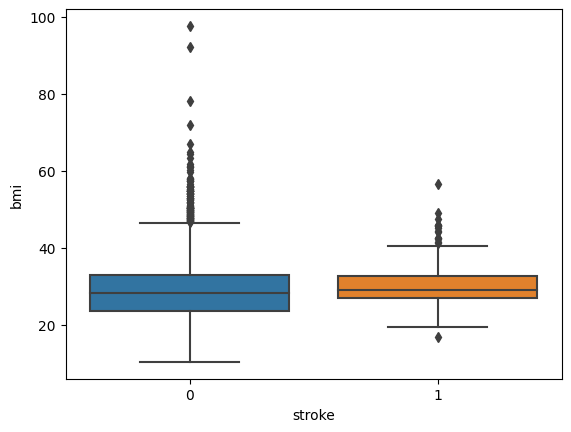

In [35]:
sns.boxplot(data=df,x='stroke',y='bmi')
# bmi with respect to Stroke

## One hot encode categorical variables

Many machine learning algorithms require all the input and output variables to be numeric.

In these cases, one-hot encoding comes in help because it transforms categorical data into numerical; in other words: it transforms strings into numbers so that we can apply our Machine Learning algorithms without any problems.

In [36]:
# One hot encode without squishing
def perform_one_hot_encode(df,cols):
    df=pd.get_dummies(df,columns=cols,prefix_sep="_")
    return df

df=perform_one_hot_encode(df,["gender",
                              "ever_married",
                              "work_type",
                              "Residence_type",
                              "smoking_status",
                                                           ])

df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.9,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


## Correlation matrix

Good variables correlate highly with the target. But in the best case they should be uncorrelated amongst themselves.

Age has the strongest correlation with stroke (0.25), which is still farely weak.
Followed by hypertension 0.13 and heart disease 0.13. Also average glucose levels seem to be one of the higher correlated variables 0.13, however the remaining variables show very weak correlations with stroke.


In [ ]:
# Check for Multicolinearity
# Good variables correlate highly with the target.
# Variables should be correlated with the target but uncorrelated amongst themselves.
# Checking for multicollinearity
%matplotlib inline

cor = df.corr()

# COrrelation HEatmap
plt.figure(figsize = (24,24))
sns.heatmap(cor, annot = True)

## Standardization of continuous variables

Standardization of variables is a common requirement for many machine learning estimators implemented; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In [38]:
# Rearranging columns placing stroke as last column:
df = df[[c for c in df if c not in ['stroke']]
       + ['stroke']]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   hypertension                    5109 non-null   int64  
 2   heart_disease                   5109 non-null   int64  
 3   avg_glucose_level               5109 non-null   float64
 4   bmi                             5109 non-null   float64
 5   gender_Female                   5109 non-null   uint8  
 6   gender_Male                     5109 non-null   uint8  
 7   ever_married_No                 5109 non-null   uint8  
 8   ever_married_Yes                5109 non-null   uint8  
 9   work_type_Govt_job              5109 non-null   uint8  
 10  work_type_Never_worked          5109 non-null   uint8  
 11  work_type_Private               5109 non-null   uint8  
 12  work_type_Self-employed         51

In [41]:
print(df.iloc[-1])

age                               44.00
hypertension                       0.00
heart_disease                      0.00
avg_glucose_level                 85.28
bmi                               26.20
gender_Female                      1.00
gender_Male                        0.00
ever_married_No                    0.00
ever_married_Yes                   1.00
work_type_Govt_job                 1.00
work_type_Never_worked             0.00
work_type_Private                  0.00
work_type_Self-employed            0.00
work_type_children                 0.00
Residence_type_Rural               0.00
Residence_type_Urban               1.00
smoking_status_Unknown             1.00
smoking_status_formerly smoked     0.00
smoking_status_never smoked        0.00
smoking_status_smokes              0.00
stroke                             0.00
Name: 5109, dtype: float64


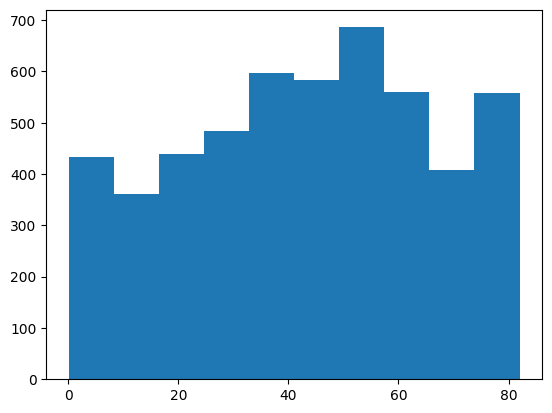

In [42]:
# We need to put our numerical variables into an input matrix X and an output vector y
# Consider as input data all columns but the last (stroke output), which will be my output variable y
X = df.iloc[:,:-1]

# Output data Stroke column
Y = df.iloc[:,-1].values


# plot histogram of values for the age
plt.hist(X['age']);

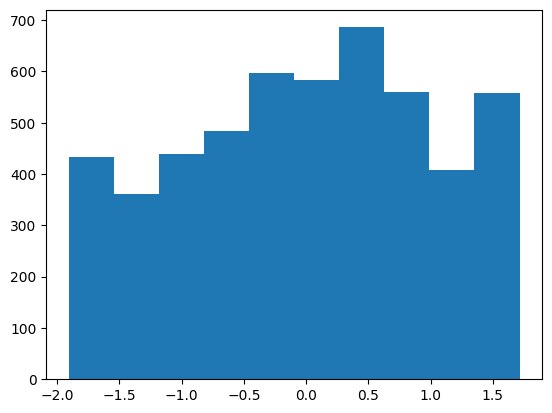

In [43]:
# We need to standardize all input here in order to have standardized scales
X = StandardScaler().fit_transform(X)

plt.hist(X[:, 0]); # plot histogram of values for the bmi feature

## Target variable Stroke

The target variable "Stroke" is severly imbalanced

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

This might result in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important (in our case detecting stroke) and therefore the problem is more sensitive to classification errors for the minority class than the majority class. However, many "real life" datasets are imbalanced.



In [44]:
# Show number of subjects not being labeled as having stroke(negative) vs. having stroke(positive):
print(Counter(Y))

Counter({0: 4860, 1: 249})


<Axes: xlabel='stroke', ylabel='count'>

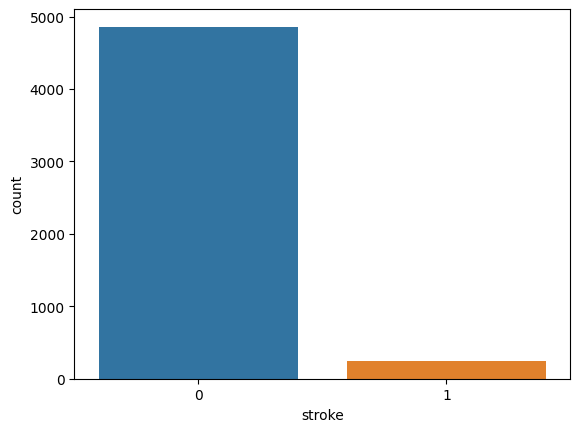

In [45]:
sns.countplot(data=df,x='stroke')
# Count Plot of Stroke

# C. Data splitting

In [46]:
# Splitting traintest
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size=0.3, stratify=Y) # stratifying = y to make sure that class proportions are preserved when splitting

# D. Class balancing: Comparing multiple balancing techniques (imblearn)

Imbalanced-learn (imported as imblearn) is an open source, MIT-licensed library relying on scikit-learn (imported as sklearn) and provides tools when dealing with classification with imbalanced classes.

Resampling methods can generate different versions of our TRAINING SE that can be used to simulate how well models would perform on new data. These techniques differ in terms of how the resampled versions of the data are created and how many iterations of the simulation process are conducted. In each case, a resampling scheme generates/deletes a subset of the data to be used for modeling and another that is used for measuring performance.

One should never resample the test data (e.g resampling X,Y before train-test split), to prevent data leakage.

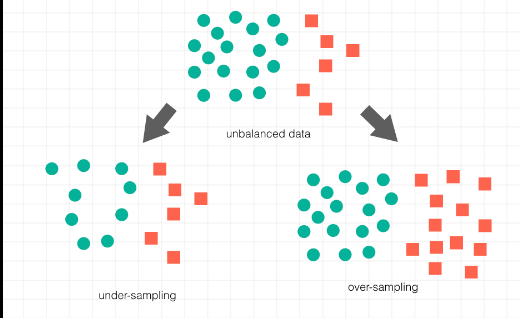

Fig.1 ***Random oversampling***: Randomly duplicates examples in the minority class ***Random under-sampling***: Randomly selecting majority class and deleting from the training set








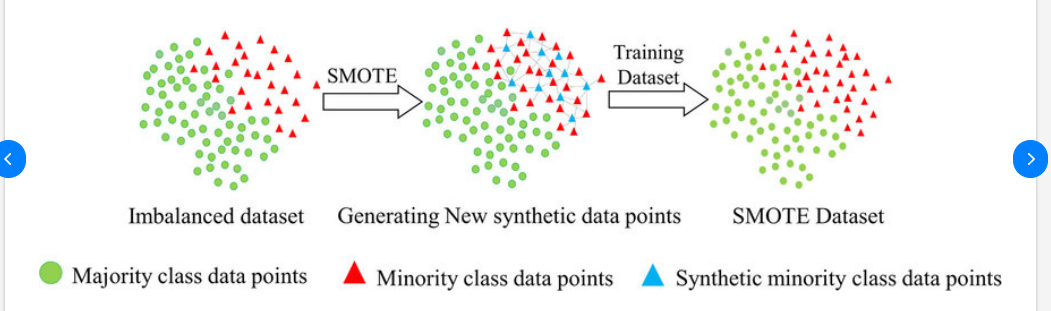

Fig.2***SMOTE***: Synthetic minority over-sampling is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling




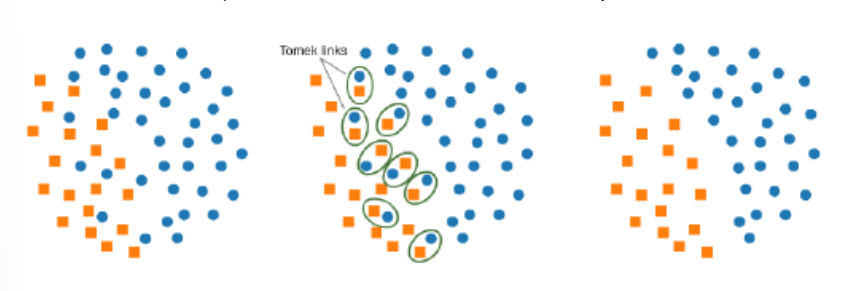

Fig.3***SMOTETOMEK***: Under-sampling technique developed by Ivan Tomek. Modification of condensed nearst neighbors. Finding desired samples from the majority class that has the lowest Euclidean distance with the minority class data and then remove it.


***SMOTEENN***: Performs up and downsampling at the same time and implements edited neirest neighbours to clean data.

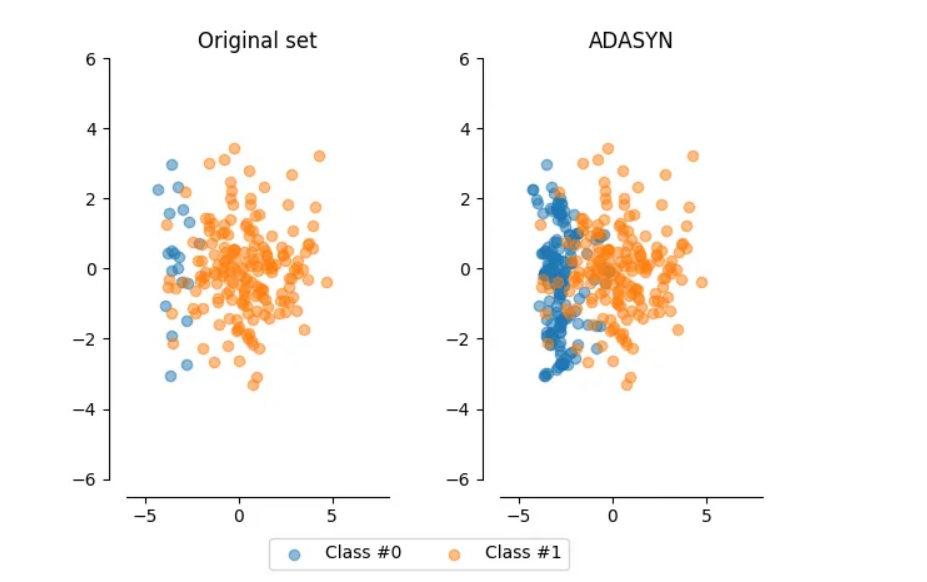

Fig. 4 ***ADASYN***: Generating synthetic data not only copying it, but also generating "harder to learn data" minority examples




In [46]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1
1,61.0,0,0,202.21,28.9,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
3,49.0,0,0,171.23,34.4,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1


## SMOTETOMEK

In [47]:
# Smote with tomek links
smt = SMOTETomek(random_state=42)

X_tr_smtomek, Y_tr_smtomek = smt.fit_resample(X_tr, Y_tr)

print(Counter(Y_tr_smtomek))

Counter({0: 3369, 1: 3369})


## SMOTENN

In [48]:
sme = SMOTEENN(sampling_strategy='minority')
X_tr_smteen, Y_tr_smteen = sme.fit_resample(X_tr, Y_tr)
print('Resampled dataset shape %s' % Counter(Y_tr_smteen))

Resampled dataset shape Counter({1: 3194, 0: 2786})


##ADAYSN

In [49]:
ada = ADASYN(random_state=42)
X_tr_ada, Y_tr_ada = ada.fit_resample(X_tr, Y_tr)
print('Resampled dataset shape %s' % Counter(Y_tr_ada))

Resampled dataset shape Counter({1: 3434, 0: 3402})


# E. Model building with/without class balancing

## 1. Model bulding without class balancing (Baseline)

In [50]:
# Choose the baseline models for fitting.
unbalanced_models = [
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("SVM (Linear Kernel)", SVC(kernel="linear")),
    ("SVM (RBF Kernel)", SVC(kernel="rbf", probability=True)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)),
    ("Perceptron", Perceptron(max_iter=1000, random_state=42))
]

results = []

# Looping over all models and fitting them to training data
for model_name, model in unbalanced_models:
    model.fit(X_tr, Y_tr)
    Y_pred = model.predict(X_te)
    f1 = f1_score(Y_te, Y_pred)
    accuracy_tr = model.score(X_tr, Y_tr)
    accuracy_te = model.score(X_te, Y_te)

# Create classification report for all models: Precision, Recall,f1 scores
    classification_rep = classification_report(Y_te, Y_pred, output_dict=True)
    precision_no_stroke = classification_rep['0']['precision']
    recall_no_stroke = classification_rep['0']['recall']
    f1_no_stroke = classification_rep['0']['f1-score']
    precision_stroke = classification_rep['1']['precision']
    recall_stroke = classification_rep['1']['recall']
    f1_stroke = classification_rep['1']['f1-score']

    results.append([
        model_name,
        accuracy_tr,
        accuracy_te,
        f1,
        precision_no_stroke,
        recall_no_stroke,
        f1_no_stroke,
        precision_stroke,
        recall_stroke,
        f1_stroke
    ])

columns = [
    "Model",
    "Train Accuracy",
    "Test Accuracy",
    "F1 Score",
    "Precision (no stroke)",
    "Recall (no stroke)",
    "F1 Score (no stroke)",
    "Precision (stroke)",
    "Recall (stroke)",
    "F1 Score (stroke)"
]

df = pd.DataFrame(results, columns=columns)
df = df.sort_values(by='F1 Score', ascending=False)

print(df.to_markdown(index=False))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

| Model               |   Train Accuracy |   Test Accuracy |   F1 Score |   Precision (no stroke) |   Recall (no stroke) |   F1 Score (no stroke) |   Precision (stroke) |   Recall (stroke) |   F1 Score (stroke) |
|:--------------------|-----------------:|----------------:|-----------:|------------------------:|---------------------:|-----------------------:|---------------------:|------------------:|--------------------:|
| Decision Tree       |         1        |        0.90998  |  0.1375    |                0.955801 |             0.949246 |               0.952512 |            0.129412  |         0.146667  |           0.1375    |
| Perceptron          |         0.935962 |        0.942596 |  0.137255  |                0.954847 |             0.986283 |               0.97031  |            0.259259  |         0.0933333 |           0.137255  |
| Naive Bayes         |         0.352629 |        0.343118 |  0.128139  |                0.997792 |             0.310014 |               0.473051 | 

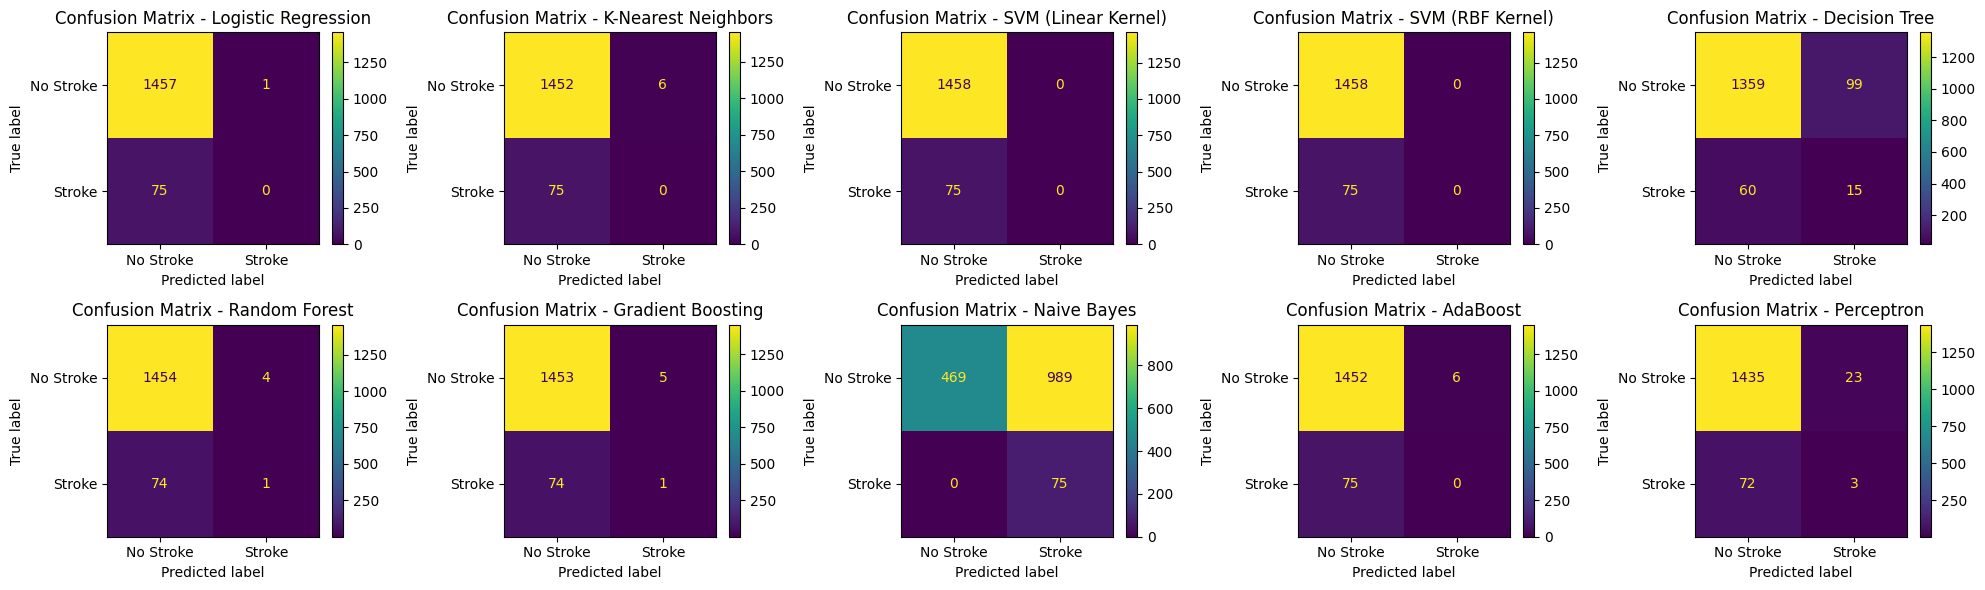

In [62]:
# Confusion matrices
fig, axes = plt.subplots(2, 5,figsize=(20, 6))
axes = axes.ravel()

for idx, (model_name, model) in enumerate(unbalanced_models):
    Y_pred = model.predict(X_te)
    cm = confusion_matrix(Y_te, Y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
    disp.plot(ax=axes[idx])
    disp.ax_.set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()

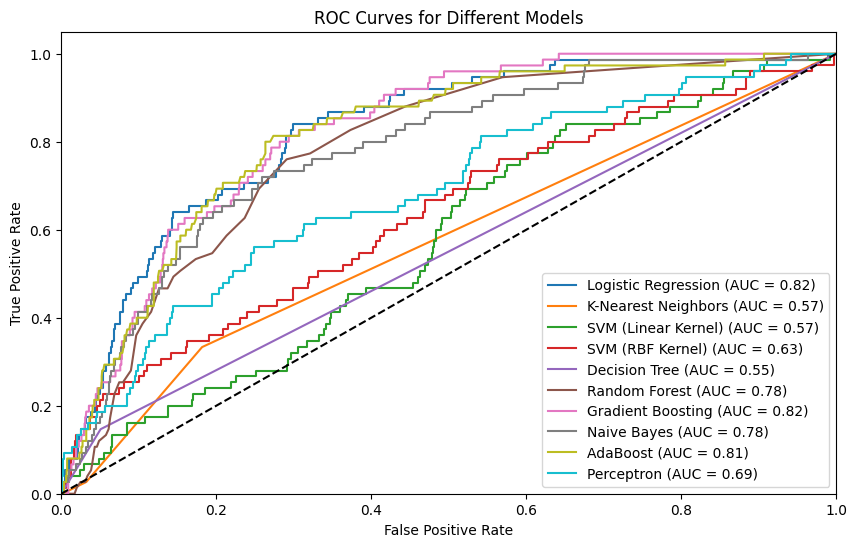

In [51]:
# ROC curve
plt.figure(figsize=(10, 6))
for model_name, model in unbalanced_models:
    if hasattr(model, "decision_function"):
        Y_pred_scores = model.decision_function(X_te)
    elif hasattr(model, "predict_proba"):
        Y_pred_scores = model.predict_proba(X_te)[:, 1]
    else:
        raise ValueError("Model does not have decision_function or predict_proba.")

    fpr, tpr, thresholds = roc_curve(Y_te, Y_pred_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

ROC CURVES in inbalanced data.

ROC curves consider both true positive rate (sensitivity) and true negative rate (specificity), which can be misleading when dealing with imbalanced datasets. In our highly imbalanced scenario, the models achieve a high true negative rate by simply predicting the majority class, leading to an artificially high area under the ROC curve (AUC-ROC) in some models beneath.

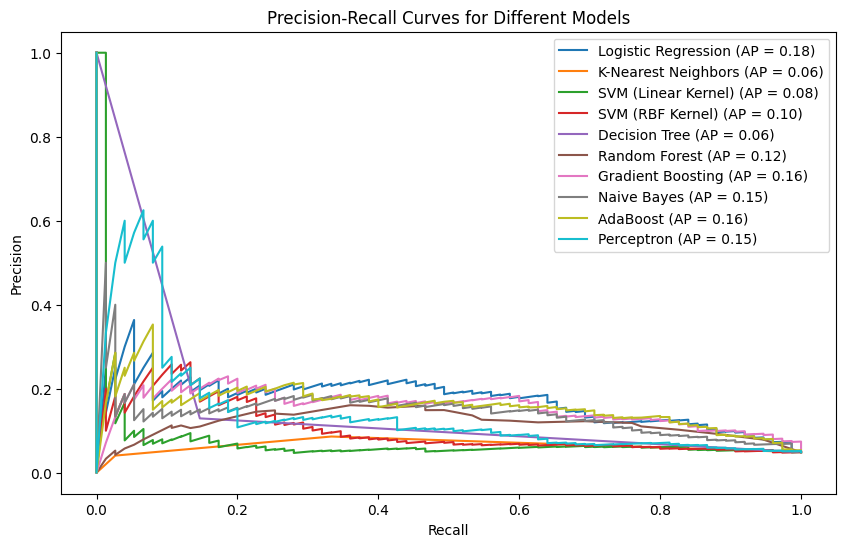

In [52]:
plt.figure(figsize=(10, 6))

for model_name, model in unbalanced_models:
    if hasattr(model, "decision_function"):
        Y_pred_scores = model.decision_function(X_te)
    elif hasattr(model, "predict_proba"):
        Y_pred_scores = model.predict_proba(X_te)[:, 1]
    else:
        raise ValueError("Model does not have decision_function or predict_proba.")

    precision, recall, _ = precision_recall_curve(Y_te, Y_pred_scores)
    avg_precision = average_precision_score(Y_te, Y_pred_scores)

    plt.plot(recall, precision, label=f'{model_name} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend(loc="upper right")
plt.show()

All in all we can see a bad detection performance for all models due to high inbalance in the dataset:

It correctly identifies that the majority of people do not have stroke but this is expected, due to the majority class (stroke = 0) being highly overreptsented in the sample. Which leads us to having a high accuracy score, since accuracy depends on the "number of correctly classified instances". Therefore one should consider taking metrics such as: f1 = harmonic mean of precision & recall as reference.


 **PRECISION:** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label someone as having a stroke that truly does not have a stroke.



 **RECALL:** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.



 **F1:** The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal

## 2. Model building (Undersampling)

In [79]:
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_tr_rus, Y_tr_rus = rus.fit_resample(X_tr, Y_tr)

print(Counter(Y_tr_rus))

Counter({0: 174, 1: 174})


In [ ]:
rus_models = [
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("SVM (Linear Kernel)", SVC(kernel="linear")),
    ("SVM (RBF Kernel)", SVC(kernel="rbf", probability=True)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)),
    ("XGBoost", xgb.XGBClassifier())
]

results = []

for model_name, model in rus_models:
    model.fit(X_tr_rus, Y_tr_rus)
    Y_pred = model.predict(X_te)
    f1 = f1_score(Y_te, Y_pred)
    accuracy_tr = model.score(X_tr_rus, Y_tr_rus)
    accuracy_te = model.score(X_te, Y_te)
# classification report
    classification_rep = classification_report(Y_te, Y_pred, output_dict=True)
    precision_no_stroke = classification_rep['0']['precision']
    recall_no_stroke = classification_rep['0']['recall']
    f1_no_stroke = classification_rep['0']['f1-score']
    precision_stroke = classification_rep['1']['precision']
    recall_stroke = classification_rep['1']['recall']
    f1_stroke = classification_rep['1']['f1-score']

    results.append([
        model_name,
        accuracy_tr,
        accuracy_te,
        f1,
        precision_no_stroke,
        recall_no_stroke,
        f1_no_stroke,
        precision_stroke,
        recall_stroke,
        f1_stroke
    ])

columns = [
    "Model",
    "Train Accuracy",
    "Test Accuracy",
    "F1 Score",
    "Precision (no stroke)",
    "Recall (no stroke)",
    "F1 Score (no stroke)",
    "Precision (stroke)",
    "Recall (stroke)",
    "F1 Score (stroke)"
]

df = pd.DataFrame(results, columns=columns)
df = df.sort_values(by='F1 Score', ascending=False)

print(df.to_markdown(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


| Model               |   Train Accuracy |   Test Accuracy |   F1 Score |   Precision (no stroke) |   Recall (no stroke) |   F1 Score (no stroke) |   Precision (stroke) |   Recall (stroke) |   F1 Score (stroke) |
|:--------------------|-----------------:|----------------:|-----------:|------------------------:|---------------------:|-----------------------:|---------------------:|------------------:|--------------------:|
| Logistic Regression |         0.772989 |        0.729941 |   0.206897 |                0.980663 |             0.730453 |               0.837264 |            0.120805  |          0.72     |            0.206897 |
| Random Forest       |         1        |        0.696673 |   0.205128 |                0.985337 |             0.691358 |               0.812576 |            0.117647  |          0.8      |            0.205128 |
| SVM (Linear Kernel) |         0.79023  |        0.711024 |   0.201802 |                0.981956 |             0.709191 |               0.823576 | 

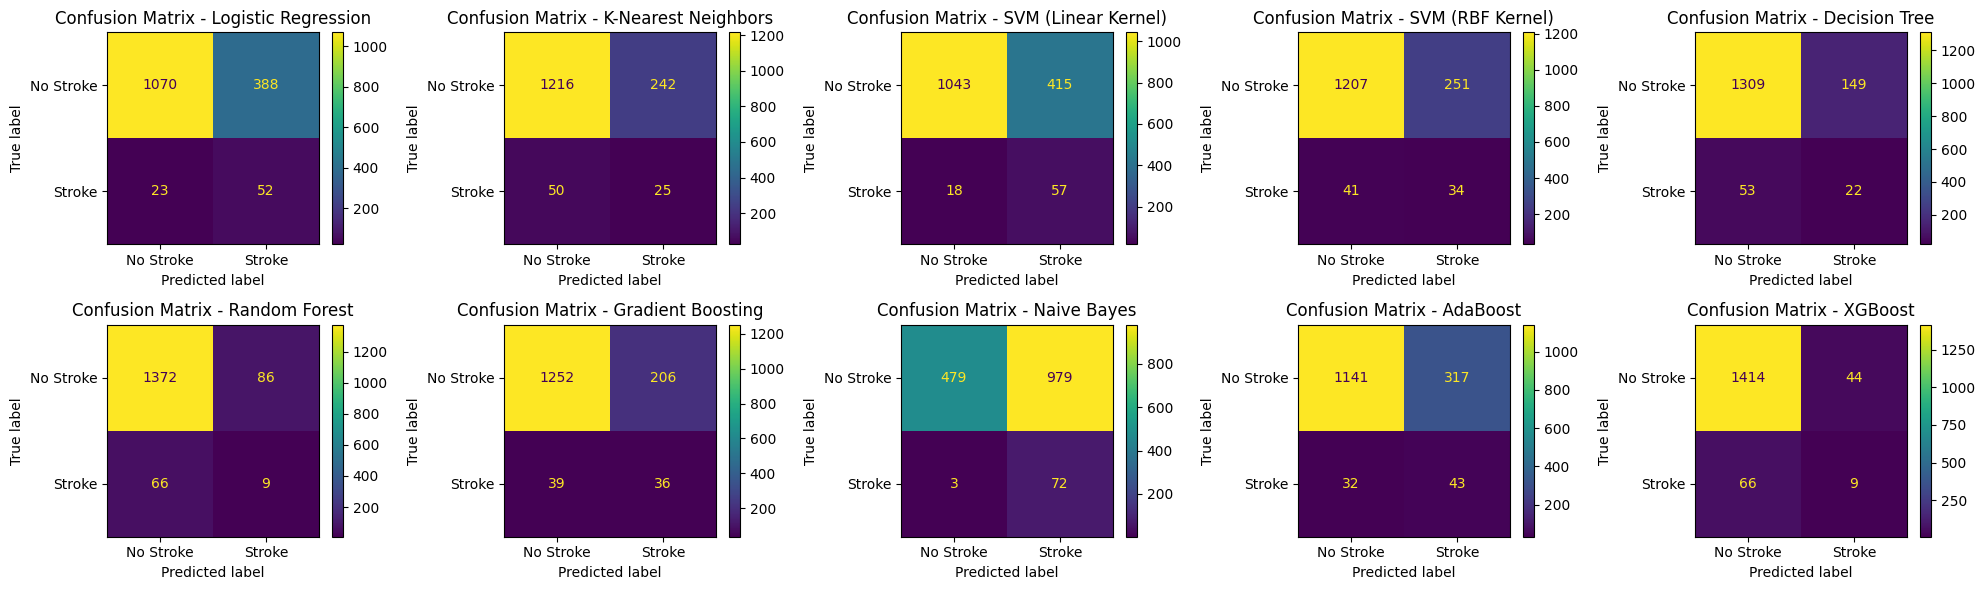

In [ ]:
# Confusion matrices:
fig, axes = plt.subplots(2, 5,figsize=(20, 6))
axes = axes.ravel()

for idx, (model_name, model) in enumerate(rus_models):
    Y_pred = model.predict(X_te)
    cm = confusion_matrix(Y_te, Y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
    disp.plot(ax=axes[idx])
    disp.ax_.set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()

**Hyperparameter tuning **

Randomized search cross validation (CV)

Randomized Search Cross Validation is a technique I will use to tune the hyperparameters of my models using a randomized search approach in combination with cross-validation. It is an alternative to grid search, which usually exhaustively searches through all possible combinations of hyperparameter values.

In my approach Randomized search is particularly useful because my  hyperparameter search space is large and conducting an exhaustive grid search for all models would be computationally expensive and time-consuming.

Exhaustive grid-search will only be applied in case a particular model shows outstanding classification performance.



In [ ]:
# Define function for applying randomized search to all models incl. plots & tables
def train_and_evaluate (model, model_name, param_distributions,X_tr_rus,X_te,Y_tr_rus,Y_te):

  random = RandomizedSearchCV(model,
                              param_distributions,
                              n_iter=100,
                              cv=5, # 5 folds each
                              scoring="f1") # I want to base my search on finding the best e.g f1/recall/precision
  random.fit(X_tr_rus, Y_tr_rus) #
  best_model = random.best_estimator_
  best_model.fit(X_tr_rus, Y_tr_rus)
  predictions = best_model.predict(X_te)
  y_scores = best_model.predict_proba(X_te)[:, 1]
  roc_auc = roc_auc_score(Y_te, y_scores)
  accuracy = accuracy_score(Y_te, predictions)
  f1 = f1_score(Y_te, predictions)


  print("\033[1m" + model_name + "\033[0m")
  print("Accuracy: {}".format(accuracy))
  print("ROC AUC: {:.3f}".format(roc_auc))
  print("F1 score: {:.3f}".format(f1))
  print("\n")
  print("Score on train: {:.3f}".format(best_model.score(X_tr_rus, Y_tr_rus)))
  print("Score on test: {:.3f}".format(best_model.score(X_te, Y_te)))

  fig, axs = plt.subplots(1,2, figsize=(8,4))

  # ROC curves
  y_pred_proba = best_model.predict_proba(X_te)[::,1]
  fpr, tpr, _ = metrics.roc_curve(Y_te, y_pred_proba)
  auc = metrics.roc_auc_score(Y_te, y_pred_proba)
  axs[0].plot(fpr, tpr, label="AUC="+str(auc))
  axs[0].set_ylabel('True Positive Rate')
  axs[0].set_xlabel('False Positive Rate')
  axs[0].legend(loc='best')


  # Confusion matrices
  cm = confusion_matrix(Y_te, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
  disp.plot(ax=axs[1],cmap='YlGn')

  plt.tight_layout()
  plt.show()

  # final evaluation metric table to compare and choose the best models
  evaluation_metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'F1 Score': f1,
        'Train Score': best_model.score(X_tr_rus, Y_tr_rus),
        'Test Score': best_model.score(X_te, Y_te)
    }

  return evaluation_metrics

all_metrics = []

In [ ]:
# Define models that are going to be used for Random search
logreg = LogisticRegression()
KNN = KNeighborsClassifier()
SVM_linear = SVC (kernel="linear", probability = True)
SVM_RBM = SVC (kernel="rbf", probability=True)
Decision_Tree = DecisionTreeClassifier()
Random_Forest = RandomForestClassifier()
Gradient_Boost = GradientBoostingClassifier()
NB = GaussianNB() # No parameters to tune, because it is probabilistic
AdaBoost = AdaBoostClassifier()
XGB = xgb.XGBClassifier()


# Hyperparameter grid
logreg_param = {"C": [0.1, 1, 10, 100],
                 "penalty": ['l1', 'l2']
                 }

KNN_param = {"n_neighbors": [3, 5, 7, 9],
            "weights": ['uniform', 'distance']
            }

SVM_linear_param = {"C": [0.1, 1, 10, 100]
              }

SVM_RBM_param = {"C": [0.1, 1, 10, 100],
                 "gamma": ["scale", "auto"]
                 }

Decision_Tree_param = {"max_depth": [3, None],
 "criterion": ["gini", "entropy"]}

Random_forest_param = {
    "max_depth": [3, None],
    "criterion": ["gini", "entropy"]
}

Gradient_Boost_param = {"n_estimators": [50, 100, 150],
                        "learning_rate": [0.1, 0.01, 0.001]
                        }


rus_models_list = [logreg, KNN, SVM_linear,SVM_RBM,Decision_Tree,Random_Forest]
model_names=['Logistic Regression', 'K-Nearest Neighbors', 'SVM (Linear Kernel)','SVM (RBF Kernel)','Decision Tree','Random Forest']
param_dist= [logreg_param, KNN_param, SVM_linear_param,SVM_RBM_param, Decision_Tree_param,Random_forest_param]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py

Logistic Regression
Accuracy: 0.7273320287018917
ROC AUC: 0.808
F1 score: 0.211


Score on train: 0.761
Score on test: 0.727


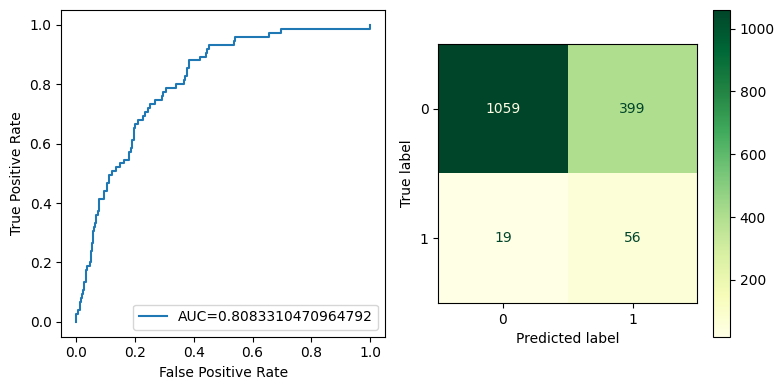

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


K-Nearest Neighbors
Accuracy: 0.6757990867579908
ROC AUC: 0.770
F1 score: 0.179


Score on train: 0.756
Score on test: 0.676


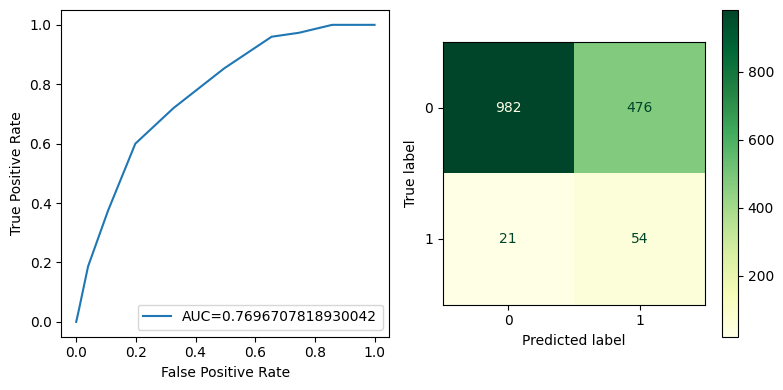

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM (Linear Kernel)
Accuracy: 0.7110241356816699
ROC AUC: 0.811
F1 score: 0.202


Score on train: 0.790
Score on test: 0.711


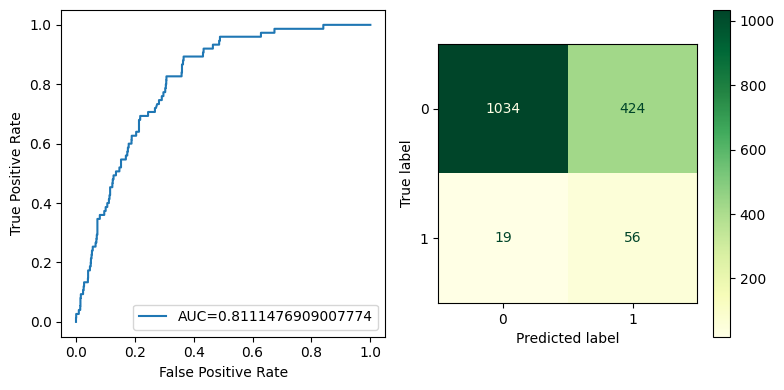

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM (RBF Kernel)
Accuracy: 0.6686236138290933
ROC AUC: 0.780
F1 score: 0.181


Score on train: 0.825
Score on test: 0.669


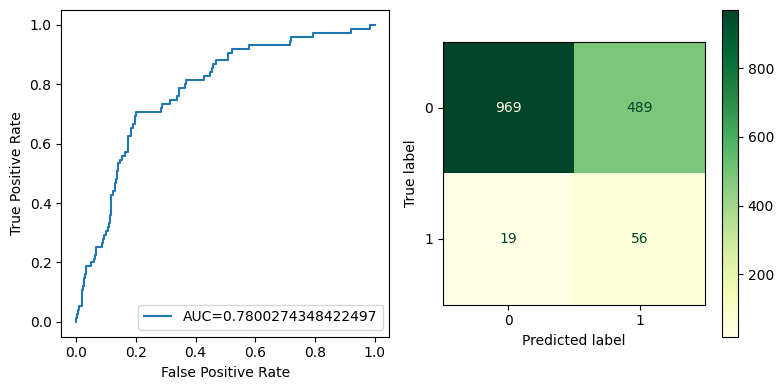

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Decision Tree
Accuracy: 0.6060013046314416
ROC AUC: 0.772
F1 score: 0.179


Score on train: 0.807
Score on test: 0.606


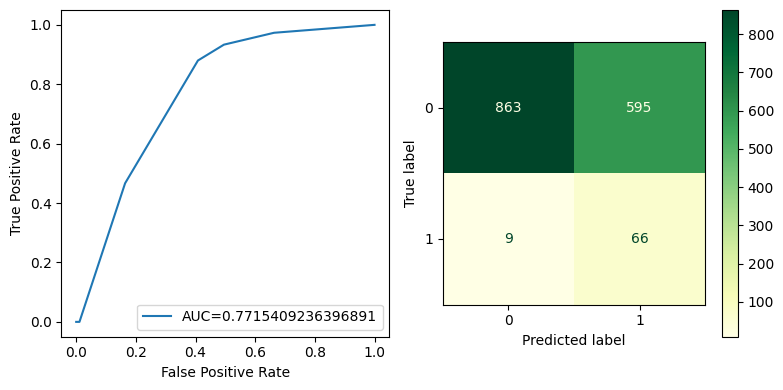

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest
Accuracy: 0.6438356164383562
ROC AUC: 0.810
F1 score: 0.192


Score on train: 0.793
Score on test: 0.644


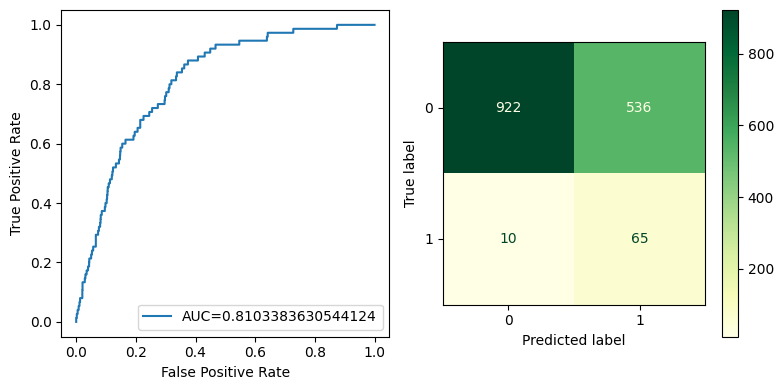


Summary Metrics Table:
                 Model  Accuracy   ROC AUC  F1 Score  Train Score  Test Score
0  Logistic Regression  0.727332  0.808331  0.211321     0.761494    0.727332
1  K-Nearest Neighbors  0.675799  0.769671  0.178512     0.755747    0.675799
2  SVM (Linear Kernel)  0.711024  0.811148  0.201802     0.790230    0.711024
3     SVM (RBF Kernel)  0.668624  0.780027  0.180645     0.824713    0.668624
4        Decision Tree  0.606001  0.771541  0.179348     0.807471    0.606001
5        Random Forest  0.643836  0.810338  0.192308     0.793103    0.643836


In [ ]:
# Here I apply the predefined train and evaluate function looping over the models list.
for i in range(len(rus_models_list)):
    metrics_dict = train_and_evaluate(rus_models_list[i], model_names[i], param_dist[i], X_tr_rus, X_te, Y_tr_rus, Y_te)
    all_metrics.append(metrics_dict)

# Create summary table to compare models
metrics_df = pd.DataFrame(all_metrics)
print("\nSummary Metrics Table:")
print(metrics_df)

After Hyperparameter tuning and cross validation the logistic regression seems to have the highest f1 score with 56 patients correctly classified as having stroke(TP), while 19 were falsely classified as not having stroke (FN).

I still keep having a high number of false positives, which is better than having a high number of false negatives in the context of stroke detection.

  --> Logistic Regression (0.211321)
                --> SVM linear (0.201802)

                Maybe I can do gridsearch on these models to improve the f1

In [ ]:
from sklearn.metrics import get_scorer_names

scorer_names = get_scorer_names()
print(scorer_names)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

 Gridsearch Logistic Regression

In [ ]:
# We need to define the grid of values we want to try. We want to choose the range
# We have to specify the parameters grid in a dictionary.
# Were each parameter is defined according to a list of possible values
# Kernel can be e.g linear One parameter C lets try different parameters / rbf
# You may say one to 5 etc. after you get experienced you will know the useful parameters.
# Here we decide the kind of values we want to assume.

# Create parameter grid
# parameter grid log (with without l1 and l2? )
import warnings
warnings.filterwarnings('ignore')

# Parameters for logistic regression grid:
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,10),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}



logreg = LogisticRegression()
grid = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='f1',        # metric for scoring
                   cv=5)                     # number of folds


grid.fit(X_tr_rus, Y_tr_rus)

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print("f1 :",grid.best_score_)
print("Tuned Hyperparameters :",grid.best_params_)
print(grid.best_estimator_)

f1 : 0.7955471348574797
Tuned Hyperparameters : {'C': 0.021544346900318832, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.021544346900318832, penalty='l1', solver='liblinear')


In [ ]:
model_logistic2 = LogisticRegression(C = 0.021544346900318832,
                                    penalty ='l1',
                                    solver = 'liblinear',
                                    ).fit(X_tr_rus, Y_tr_rus);


Y_pred = model_logistic2.predict(X_te)  # first we get the model predictions
print('The f1 score for the model is:',f1_score(Y_te, Y_pred))

The f1 score for the model is: 0.16228571428571426


I improved the f1 score marginally: So I decide to manually manipulate class weights in order to give more weight to underrepresented classes

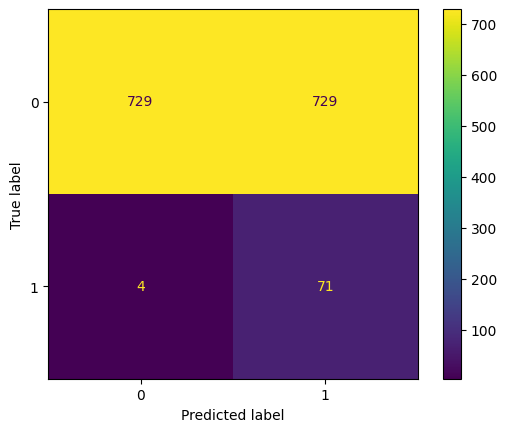

In [ ]:
Y_pred = model_logistic2.predict(X_te)  # first we get the model predictions
cm1 = confusion_matrix(Y_te, Y_pred)
cm_display = ConfusionMatrixDisplay(cm1).plot()

After cross validation using grid search I was able to increase the true positive rate, however at a cost of having a very high false positive rate. (729).

Which might be acceptable, when the cost of having false negatives is very high, such as in a stroke screening context

In [ ]:
# GRIDSEARCH FOR SVM
svc=SVC()



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]




grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_tr_rus, Y_tr_rus)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='roc_auc')

In [ ]:
 #examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8439


Parameters that give the best results : 

 {'C': 10, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=10, kernel='linear')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_te, Y_te)))

GridSearch CV score on test set: 0.8133


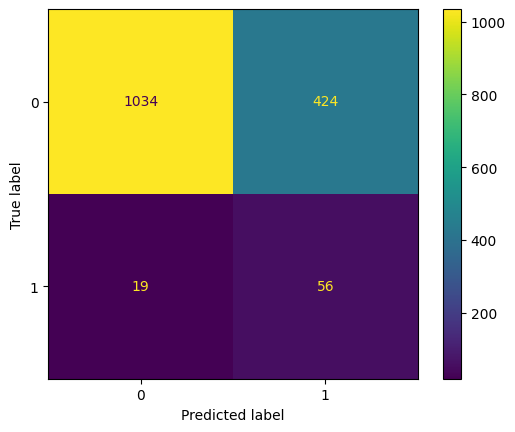

In [ ]:
# MOdel build SVM
SVM_rus = SVC(kernel="linear", C=1,probability=True).fit(X_tr_rus, Y_tr_rus);

Y_pred = SVM_rus.predict(X_te)  # first we get the model predictions
cm = confusion_matrix(Y_te, Y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
Y_pred = SVM_rus.predict(X_te)
print("SVM linear RUS")
print(classification_report(Y_te, Y_pred))

SVM linear RUS
              precision    recall  f1-score   support

           0       0.98      0.71      0.82      1458
           1       0.12      0.75      0.20        75

    accuracy                           0.71      1533
   macro avg       0.55      0.73      0.51      1533
weighted avg       0.94      0.71      0.79      1533



## 3. Model building (Oversampling)

In [ ]:
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_tr_ros, Y_tr_ros = ros.fit_resample(X_tr, Y_tr)
print(Counter(Y_tr_ros))

Counter({0: 3402, 1: 3402})


In [ ]:
ros_models = [
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("SVM (Linear Kernel)", SVC(kernel="linear")),
    ("SVM (RBF Kernel)", SVC(kernel="rbf", probability=True)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)),
    ("XGBoost", xgb.XGBClassifier())
]

results = []

for model_name, model in ros_models:
    model.fit(X_tr_ros, Y_tr_ros)
    Y_pred = model.predict(X_te)
    f1 = f1_score(Y_te, Y_pred)
    accuracy_tr = model.score(X_tr_ros, Y_tr_ros)
    accuracy_te = model.score(X_te, Y_te)
# classification report
    classification_rep = classification_report(Y_te, Y_pred, output_dict=True)
    precision_no_stroke = classification_rep['0']['precision']
    recall_no_stroke = classification_rep['0']['recall']
    f1_no_stroke = classification_rep['0']['f1-score']
    precision_stroke = classification_rep['1']['precision']
    recall_stroke = classification_rep['1']['recall']
    f1_stroke = classification_rep['1']['f1-score']

    results.append([
        model_name,
        accuracy_tr,
        accuracy_te,
        f1,
        precision_no_stroke,
        recall_no_stroke,
        f1_no_stroke,
        precision_stroke,
        recall_stroke,
        f1_stroke
    ])

columns = [
    "Model",
    "Train Accuracy",
    "Test Accuracy",
    "F1 Score",
    "Precision (no stroke)",
    "Recall (no stroke)",
    "F1 Score (no stroke)",
    "Precision (stroke)",
    "Recall (stroke)",
    "F1 Score (stroke)"
]

df = pd.DataFrame(results, columns=columns)
df = df.sort_values(by='F1 Score', ascending=False)

print(df.to_markdown(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


| Model               |   Train Accuracy |   Test Accuracy |   F1 Score |   Precision (no stroke) |   Recall (no stroke) |   F1 Score (no stroke) |   Precision (stroke) |   Recall (stroke) |   F1 Score (stroke) |
|:--------------------|-----------------:|----------------:|-----------:|------------------------:|---------------------:|-----------------------:|---------------------:|------------------:|--------------------:|
| Gradient Boosting   |         0.89271  |        0.799739 |   0.238213 |                0.977593 |             0.807956 |               0.884716 |            0.146341  |         0.64      |            0.238213 |
| Logistic Regression |         0.78836  |        0.753425 |   0.234818 |                0.98474  |             0.752401 |               0.853033 |            0.138425  |         0.773333  |            0.234818 |
| SVM (Linear Kernel) |         0.782187 |        0.741031 |   0.232108 |                0.986251 |             0.737997 |               0.844253 | 

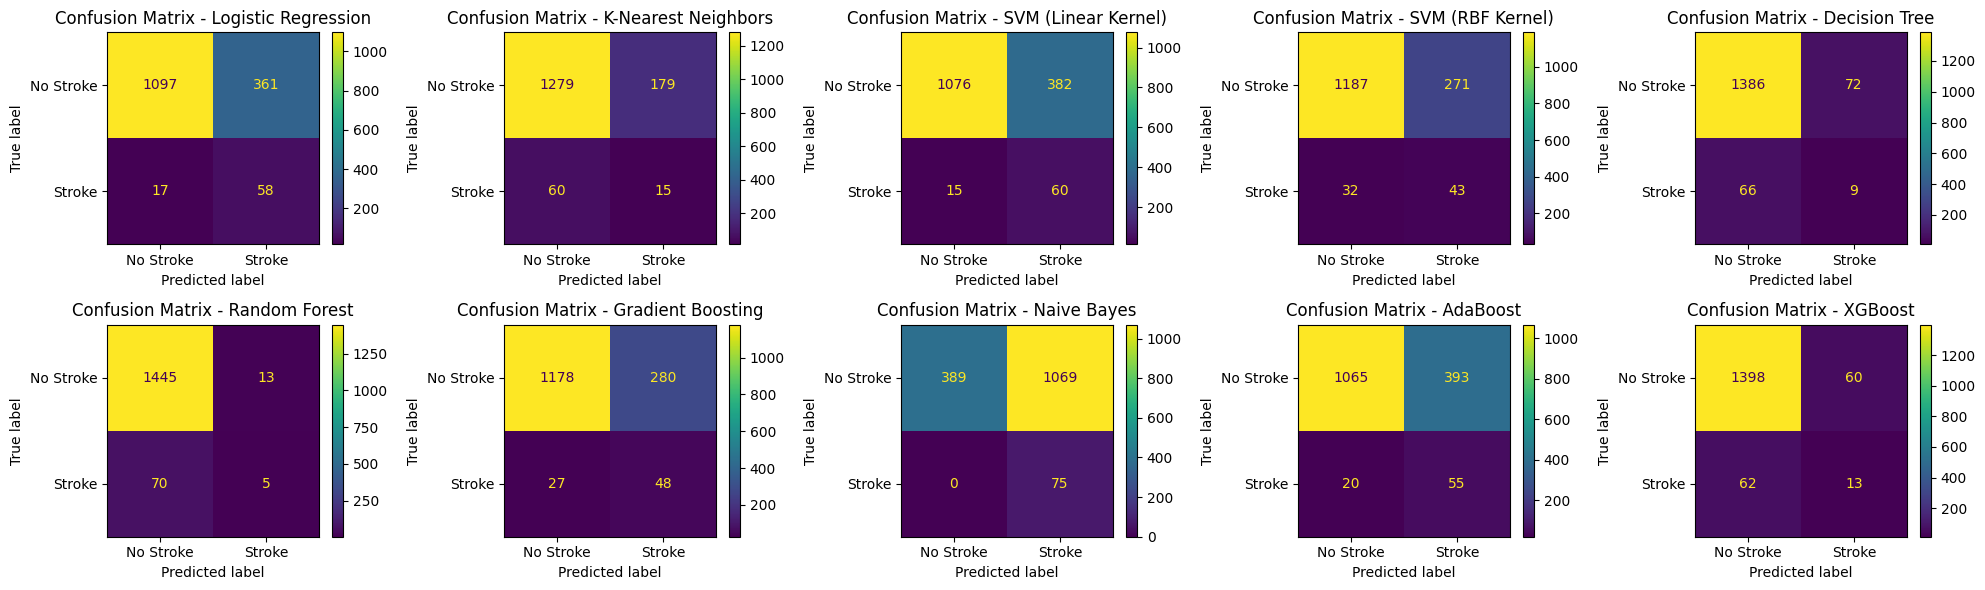

In [ ]:
# Confusion matrices:
fig, axes = plt.subplots(2, 5,figsize=(20, 6))
axes = axes.ravel()

for idx, (model_name, model) in enumerate(ros_models):
    Y_pred = model.predict(X_te)
    cm = confusion_matrix(Y_te, Y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
    disp.plot(ax=axes[idx])
    disp.ax_.set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()

In [ ]:
# Define function for applying randomized search to all models incl. plots & tables
def train_and_evaluate (model, model_name, param_distributions,X_tr_ros,X_te,Y_tr_ros,Y_te):

  random = RandomizedSearchCV(model,
                              param_distributions,
                              n_iter=100,
                              cv=5,
                              scoring="f1") # I want to base my search on finding the best e.g f1/recall/precision
  random.fit(X_tr_ros, Y_tr_ros)
  best_model = random.best_estimator_
  best_model.fit(X_tr_ros, Y_tr_ros)
  predictions = best_model.predict(X_te)
  y_scores = best_model.predict_proba(X_te)[:, 1]
  roc_auc = roc_auc_score(Y_te, y_scores)
  accuracy = accuracy_score(Y_te, predictions)
  f1 = f1_score(Y_te, predictions)

  #
  print("\033[1m" + model_name + "\033[0m")
  print("Accuracy: {}".format(accuracy))
  print("ROC AUC: {:.3f}".format(roc_auc))
  print("F1 score: {:.3f}".format(f1))
  print("\n")
  print("Score on train: {:.3f}".format(best_model.score(X_tr_ros, Y_tr_ros)))
  print("Score on test: {:.3f}".format(best_model.score(X_te, Y_te)))

  fig, axs = plt.subplots(1,2, figsize=(8,4))

  # ROC curves
  y_pred_proba = best_model.predict_proba(X_te)[::,1]
  fpr, tpr, _ = metrics.roc_curve(Y_te, y_pred_proba)
  auc = metrics.roc_auc_score(Y_te, y_pred_proba)
  axs[0].plot(fpr, tpr, label="AUC="+str(auc))
  axs[0].set_ylabel('True Positive Rate')
  axs[0].set_xlabel('False Positive Rate')
  axs[0].legend(loc='best')


  # Confusion matrices
  cm = confusion_matrix(Y_te, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
  disp.plot(ax=axs[1],cmap='YlGn')

  plt.tight_layout()
  plt.show()

  # final evaluation metric table to compare and choose the best models
  evaluation_metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'F1 Score': f1,
        'Train Score': best_model.score(X_tr_ros, Y_tr_ros),
        'Test Score': best_model.score(X_te, Y_te)
    }

  return evaluation_metrics

all_metrics = []

In [ ]:
logreg = LogisticRegression()
KNN = KNeighborsClassifier()
SVM_linear = SVC (kernel="linear", probability = True)
SVM_RBM = SVC (kernel="rbf", probability=True)
Decision_Tree = DecisionTreeClassifier()
Random_Forest = RandomForestClassifier()
Gradient_Boost = GradientBoostingClassifier()
NB = GaussianNB() # No parameters to tune, because it is probabilistic
AdaBoost = AdaBoostClassifier()
XGB = xgb.XGBClassifier()


# Hyperparameter grid
logreg_param = {"C": [0.1, 1, 10, 100],
                 "penalty": ['l1', 'l2']
                 }

KNN_param = {"n_neighbors": [3, 5, 7, 9],
            "weights": ['uniform', 'distance']
            }

SVM_linear_param = {"C": [0.1, 1, 10, 100]
              }

SVM_RBM_param = {"C": [0.1, 1, 10, 100],
                 "gamma": ["scale", "auto"]
                 }

Decision_Tree_param = {"max_depth": [3, None],
 "criterion": ["gini", "entropy"]}

Random_forest_param = {
    "max_depth": [3, None],
    "criterion": ["gini", "entropy"]
}

Gradient_Boost_param = {"n_estimators": [50, 100, 150],
                        "learning_rate": [0.1, 0.01, 0.001]
                        }


ros_models_list = [logreg, KNN, SVM_linear,SVM_RBM,Decision_Tree,Random_Forest]
model_names=['Logistic Regression', 'K-Nearest Neighbors', 'SVM (Linear Kernel)','SVM (RBF Kernel)','Decision Tree','Random Forest']
param_dist= [logreg_param, KNN_param, SVM_linear_param,SVM_RBM_param, Decision_Tree_param,Random_forest_param]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py

Logistic Regression
Accuracy: 0.7547292889758643
ROC AUC: 0.829
F1 score: 0.236


Score on train: 0.789
Score on test: 0.755


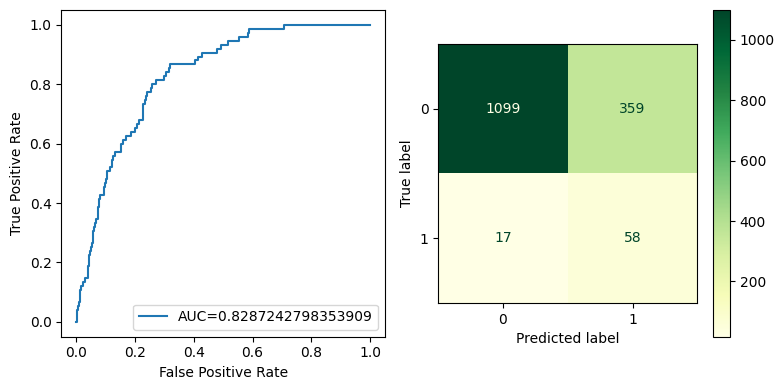

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


K-Nearest Neighbors
Accuracy: 0.8812785388127854
ROC AUC: 0.538
F1 score: 0.090


Score on train: 1.000
Score on test: 0.881


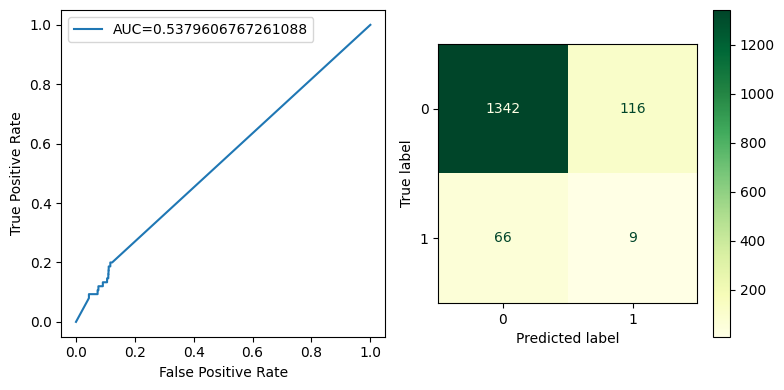

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM (Linear Kernel)
Accuracy: 0.741030658838878
ROC AUC: 0.825
F1 score: 0.232


Score on train: 0.782
Score on test: 0.741


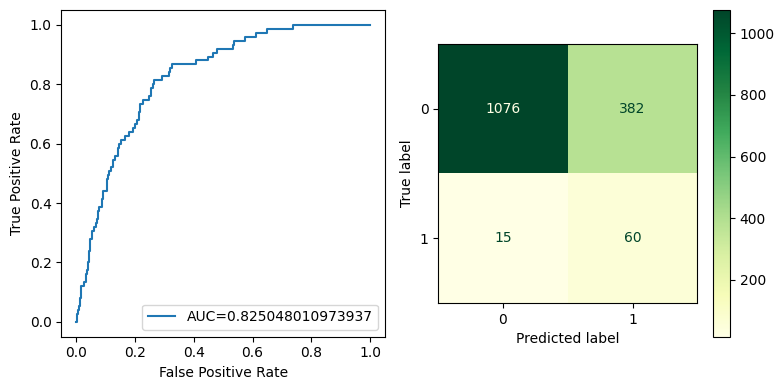

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM (RBF Kernel)
Accuracy: 0.8538812785388128
ROC AUC: 0.637
F1 score: 0.118


Score on train: 0.961
Score on test: 0.854


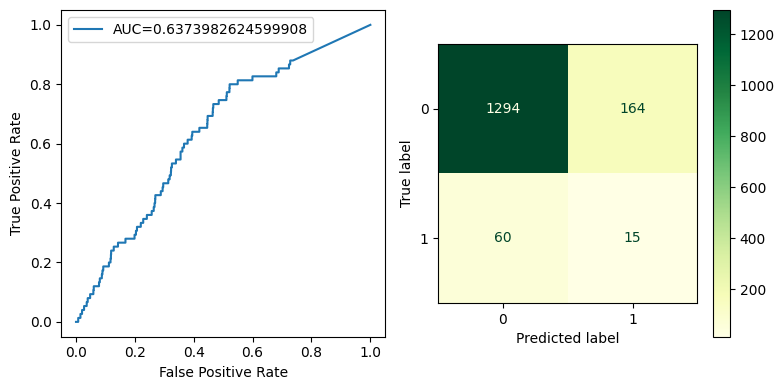

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Decision Tree
Accuracy: 0.9093281148075668
ROC AUC: 0.516
F1 score: 0.079


Score on train: 1.000
Score on test: 0.909


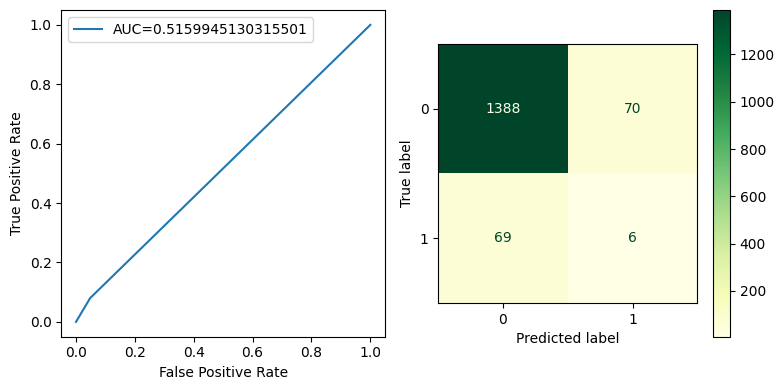

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest
Accuracy: 0.9445531637312459
ROC AUC: 0.767
F1 score: 0.086


Score on train: 1.000
Score on test: 0.945


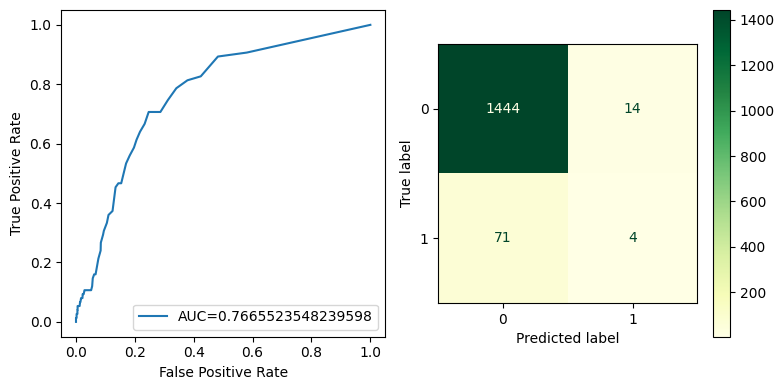


Summary Metrics Table:
                 Model  Accuracy   ROC AUC  F1 Score  Train Score  Test Score
0  Logistic Regression  0.754729  0.828724  0.235772     0.788507    0.754729
1  K-Nearest Neighbors  0.881279  0.537961  0.090000     1.000000    0.881279
2  SVM (Linear Kernel)  0.741031  0.825048  0.232108     0.782187    0.741031
3     SVM (RBF Kernel)  0.853881  0.637398  0.118110     0.960611    0.853881
4        Decision Tree  0.909328  0.515995  0.079470     1.000000    0.909328
5        Random Forest  0.944553  0.766552  0.086022     1.000000    0.944553


In [ ]:
for i in range(len(ros_models_list)):
    metrics_dict = train_and_evaluate(ros_models_list[i], model_names[i], param_dist[i], X_tr_ros, X_te, Y_tr_ros, Y_te)
    all_metrics.append(metrics_dict)


metrics_df = pd.DataFrame(all_metrics)
print("\nSummary Metrics Table:")
print(metrics_df)

Oversampling does not seem to improve the metrics a lot.

## Model building (SMOTE)

In [69]:
# make a balanced dataset by using SMOTE technique.
# Create a SMOTE object
smote = SMOTE(sampling_strategy='minority')

# Fit the SMOTE object to the training data and oversample the minority class
X_tr_smote, Y_tr_smote = smote.fit_resample(X_tr, Y_tr)

print(Counter(Y_tr_smote))

Counter({0: 3402, 1: 3402})


In [ ]:
smote_models = [
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("SVM (Linear Kernel)", SVC(kernel="linear")),
    ("SVM (RBF Kernel)", SVC(kernel="rbf", probability=True)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)),
    ("XGBoost", xgb.XGBClassifier())
]

results = []

for model_name, model in smote_models:
    model.fit(X_tr_smote, Y_tr_smote)
    Y_pred = model.predict(X_te)
    f1 = f1_score(Y_te, Y_pred)
    accuracy_tr = model.score(X_tr_smote, Y_tr_smote)
    accuracy_te = model.score(X_te, Y_te)

# classification report
    classification_rep = classification_report(Y_te, Y_pred, output_dict=True)
    precision_no_stroke = classification_rep['0']['precision']
    recall_no_stroke = classification_rep['0']['recall']
    f1_no_stroke = classification_rep['0']['f1-score']
    precision_stroke = classification_rep['1']['precision']
    recall_stroke = classification_rep['1']['recall']
    f1_stroke = classification_rep['1']['f1-score']

    results.append([
        model_name,
        accuracy_tr,
        accuracy_te,
        f1,
        precision_no_stroke,
        recall_no_stroke,
        f1_no_stroke,
        precision_stroke,
        recall_stroke,
        f1_stroke
    ])

columns = [
    "Model",
    "Train Accuracy",
    "Test Accuracy",
    "F1 Score",
    "Precision (no stroke)",
    "Recall (no stroke)",
    "F1 Score (no stroke)",
    "Precision (stroke)",
    "Recall (stroke)",
    "F1 Score (stroke)"
]

df = pd.DataFrame(results, columns=columns)
df = df.sort_values(by='F1 Score', ascending=False)

print(df.to_markdown(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


| Model               |   Train Accuracy |   Test Accuracy |   F1 Score |   Precision (no stroke) |   Recall (no stroke) |   F1 Score (no stroke) |   Precision (stroke) |   Recall (stroke) |   F1 Score (stroke) |
|:--------------------|-----------------:|----------------:|-----------:|------------------------:|---------------------:|-----------------------:|---------------------:|------------------:|--------------------:|
| SVM (Linear Kernel) |         0.798207 |        0.744945 |   0.234834 |                0.986326 |             0.742112 |               0.846967 |            0.137615  |          0.8      |            0.234834 |
| Gradient Boosting   |         0.917402 |        0.849967 |   0.233333 |                0.969419 |             0.869684 |               0.916847 |            0.155556  |          0.466667 |            0.233333 |
| Logistic Regression |         0.795267 |        0.758643 |   0.232365 |                0.983126 |             0.759259 |               0.856811 | 

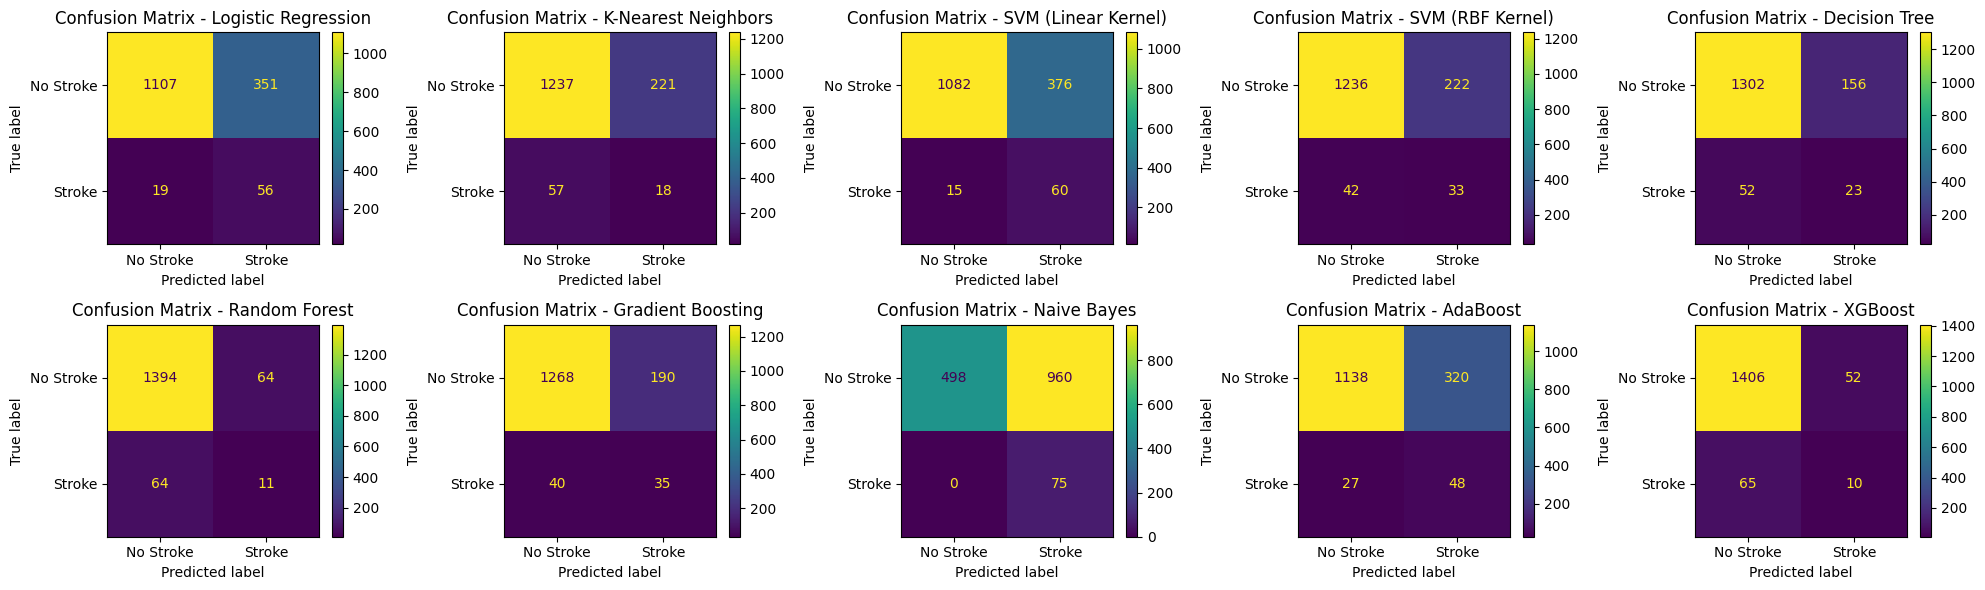

In [ ]:
# Confusion matrices
fig, axes = plt.subplots(2, 5,figsize=(20, 6))
axes = axes.ravel()

for idx, (model_name, model) in enumerate(smote_models):
    Y_pred = model.predict(X_te)
    cm = confusion_matrix(Y_te, Y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
    disp.plot(ax=axes[idx])
    disp.ax_.set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()

Random Search (Smote)

In [ ]:
# Define function for applying randomized search to all models incl. plots & tables
def train_and_evaluate (model, model_name, param_distributions,X_tr_smote,X_te,Y_tr_smote,Y_te):

  random = RandomizedSearchCV(model,
                              param_distributions,
                              n_iter=100,
                              cv=5,
                              scoring="f1") # I want to base my search on finding the best e.g f1/recall/precision
  random.fit(X_tr_smote, Y_tr_smote)
  best_model = random.best_estimator_
  best_model.fit(X_tr_smote, Y_tr_smote)
  predictions = best_model.predict(X_te)
  y_scores = best_model.predict_proba(X_te)[:, 1]
  roc_auc = roc_auc_score(Y_te, y_scores)
  accuracy = accuracy_score(Y_te, predictions)
  f1 = f1_score(Y_te, predictions)

  #
  print("\033[1m" + model_name + "\033[0m")
  print("Accuracy: {}".format(accuracy))
  print("ROC AUC: {:.3f}".format(roc_auc))
  print("F1 score: {:.3f}".format(f1))
  print("\n")
  print("Score on train: {:.3f}".format(best_model.score(X_tr_smote, Y_tr_smote)))
  print("Score on test: {:.3f}".format(best_model.score(X_te, Y_te)))

  fig, axs = plt.subplots(1,2, figsize=(8,4))

  # ROC curves
  y_pred_proba = best_model.predict_proba(X_te)[::,1]
  fpr, tpr, _ = metrics.roc_curve(Y_te, y_pred_proba)
  auc = metrics.roc_auc_score(Y_te, y_pred_proba)
  axs[0].plot(fpr, tpr, label="AUC="+str(auc))
  axs[0].set_ylabel('True Positive Rate')
  axs[0].set_xlabel('False Positive Rate')
  axs[0].legend(loc='best')


  # Confusion matrices
  cm = confusion_matrix(Y_te, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
  disp.plot(ax=axs[1],cmap='YlGn')

  plt.tight_layout()
  plt.show()

  # final evaluation metric table to compare and choose the best models
  evaluation_metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'F1 Score': f1,
        'Train Score': best_model.score(X_tr_smote, Y_tr_smote),
        'Test Score': best_model.score(X_te, Y_te)
    }

  return evaluation_metrics

all_metrics = []

In [ ]:
logreg = LogisticRegression()
KNN = KNeighborsClassifier()
SVM_linear = SVC (kernel="linear", probability = True)
SVM_RBM = SVC (kernel="rbf", probability=True)
Decision_Tree = DecisionTreeClassifier()
Random_Forest = RandomForestClassifier()
Gradient_Boost = GradientBoostingClassifier()
NB = GaussianNB() # No parameters to tune, because it is probabilistic
AdaBoost = AdaBoostClassifier()
XGB = xgb.XGBClassifier()


# Hyperparameter grid
logreg_param = {"C": [0.1, 1, 10, 100],
                 "penalty": ['l1', 'l2']
                 }

KNN_param = {"n_neighbors": [3, 5, 7, 9],
            "weights": ['uniform', 'distance']
            }

SVM_linear_param = {"C": [0.1, 1, 10, 100]
              }

SVM_RBM_param = {"C": [0.1, 1, 10, 100],
                 "gamma": ["scale", "auto"]
                 }

Decision_Tree_param = {"max_depth": [3, None],
 "criterion": ["gini", "entropy"]}

Random_forest_param = {
    "max_depth": [3, None],
    "criterion": ["gini", "entropy"]
}

Gradient_Boost_param = {"n_estimators": [50, 100, 150],
                        "learning_rate": [0.1, 0.01, 0.001]
                        }


smote_models_list = [logreg, KNN, SVM_linear,SVM_RBM,Decision_Tree,Random_Forest]
model_names=['Logistic Regression', 'K-Nearest Neighbors', 'SVM (Linear Kernel)','SVM (RBF Kernel)','Decision Tree','Random Forest']
param_dist= [logreg_param, KNN_param, SVM_linear_param,SVM_RBM_param, Decision_Tree_param,Random_forest_param]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py

Logistic Regression
Accuracy: 0.7592954990215264
ROC AUC: 0.832
F1 score: 0.233


Score on train: 0.797
Score on test: 0.759


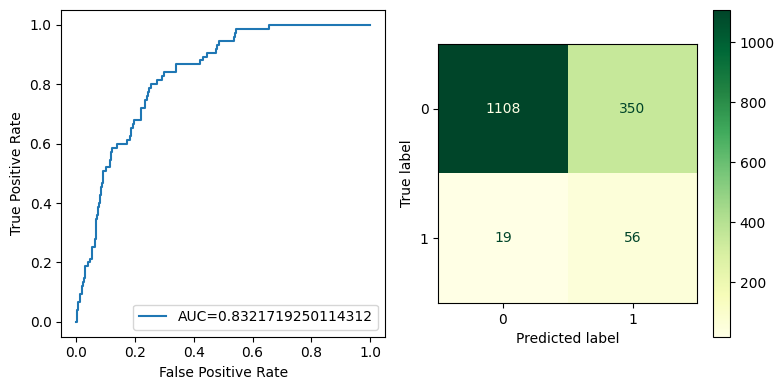

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


K-Nearest Neighbors
Accuracy: 0.8564905414220483
ROC AUC: 0.553
F1 score: 0.098


Score on train: 1.000
Score on test: 0.856


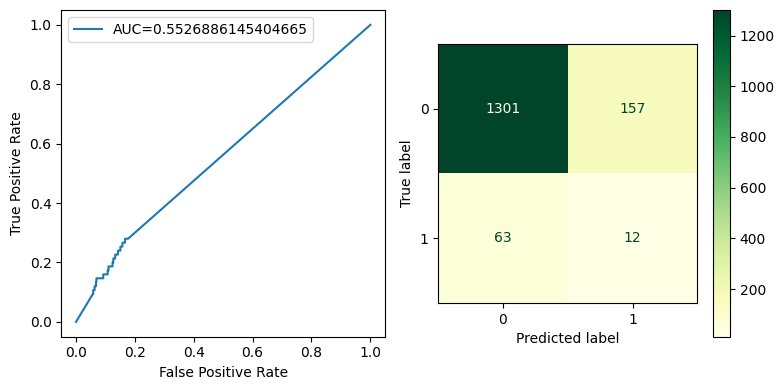

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM (Linear Kernel)
Accuracy: 0.7436399217221135
ROC AUC: 0.829
F1 score: 0.234


Score on train: 0.797
Score on test: 0.744


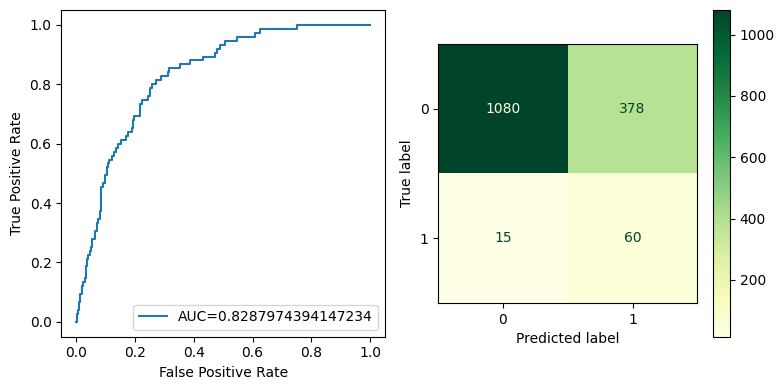

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM (RBF Kernel)
Accuracy: 0.8767123287671232
ROC AUC: 0.643
F1 score: 0.113


Score on train: 0.964
Score on test: 0.877


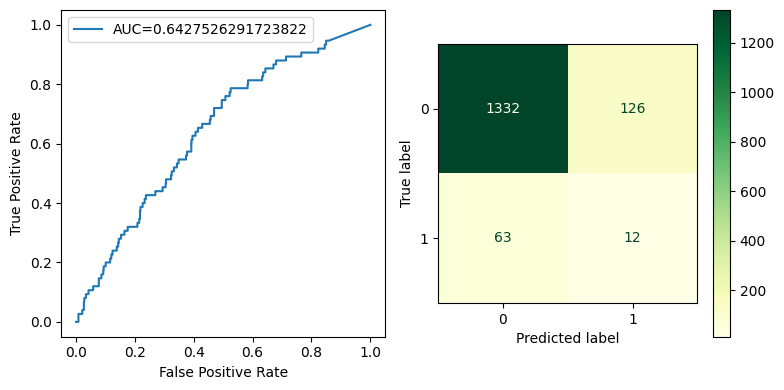

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Decision Tree
Accuracy: 0.8754076973255055
ROC AUC: 0.606
F1 score: 0.194


Score on train: 1.000
Score on test: 0.875


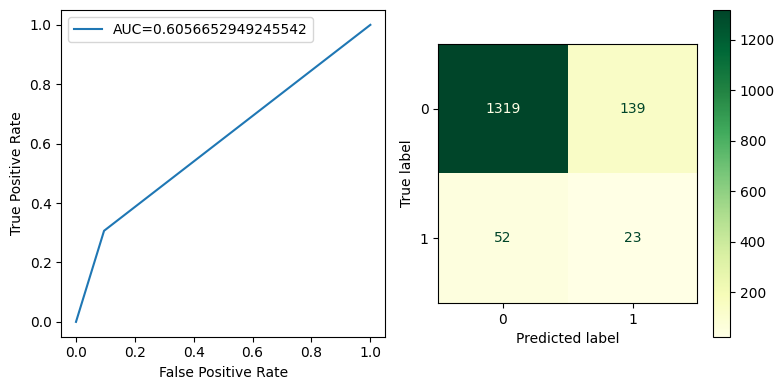

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest
Accuracy: 0.9119373776908023
ROC AUC: 0.769
F1 score: 0.118


Score on train: 1.000
Score on test: 0.912


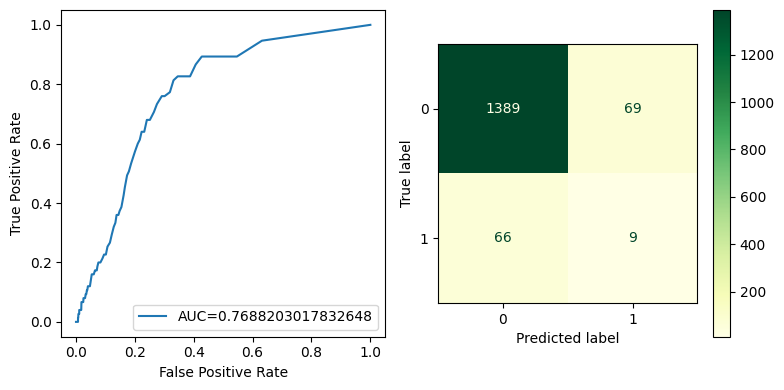


Summary Metrics Table:
                 Model  Accuracy   ROC AUC  F1 Score  Train Score  Test Score
0  Logistic Regression  0.759295  0.832172  0.232848     0.796590    0.759295
1  K-Nearest Neighbors  0.856491  0.552689  0.098361     1.000000    0.856491
2  SVM (Linear Kernel)  0.743640  0.828797  0.233918     0.797472    0.743640
3     SVM (RBF Kernel)  0.876712  0.642753  0.112676     0.963845    0.876712
4        Decision Tree  0.875408  0.605665  0.194093     1.000000    0.875408
5        Random Forest  0.911937  0.768820  0.117647     1.000000    0.911937


In [ ]:
for i in range(len(smote_models_list)):
    metrics_dict = train_and_evaluate(smote_models_list[i], model_names[i], param_dist[i], X_tr_smote, X_te, Y_tr_smote, Y_te)
    all_metrics.append(metrics_dict)


metrics_df = pd.DataFrame(all_metrics)
print("\nSummary Metrics Table:")
print(metrics_df)

Also using the synthetic minory oversampling technique does not change the f1 score much. Maybe i should opt for manually changing the weights in the loss function of the logistic regression

# Cost sensitive Logistic Regression

We can modify the current training algorithm to take into account the skewed distribution of the classes. This can be achieved by giving different weights to both the majority and minority classes. The difference in weights will influence the classification of the classes during the training phase. The whole purpose is to penalize the misclassification made by the minority class by setting a higher class weight and at the

The weighting can penalize the model less for errors committed on instances from the majority class and penalize the model more for errors committed on instances from the minority class. The outcome is a variant of logistic regression that feature improved performance on imbalanced classification activities, generally referenced to as cost-sensitive or weighted logistic regression.

Here I will implement grid search(cross validation) for finding the optimal weights to increase the f1 metric giving more weight to the positive class (stroke class). Hereby, I create a loop that will search for weights from 0 to 200 fold increases for each class.


Inspired by: https://aicorespot.io/cost-sensitive-logistic-regression-with-regards-to-imbalanced-classification/

In [63]:
# https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/?
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve
lr = LogisticRegression()

# Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

# Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights],
              }
# f1 score
scorer = make_scorer(f1_score)


#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr,
                          param_grid= param_grid,
                          cv=StratifiedKFold(),
                          n_jobs=-1,
                          scoring= scorer,
                          verbose=True).fit(X_tr, Y_tr)

pd.DataFrame(gridsearch.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print("f1 :",gridsearch.best_score_)
print("Tuned Hyperparameters :",gridsearch.best_params_)
print(gridsearch.best_estimator_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
f1 : 0.27230567111952986
Tuned Hyperparameters : {'class_weight': {0: 0.1392964824120603, 1: 0.8607035175879397}}
LogisticRegression(class_weight={0: 0.1392964824120603, 1: 0.8607035175879397})


In [67]:
# Creating new model
lrw = LogisticRegression(class_weight={0: 0.1392964824120603,
                                 1: 0.8607035175879397}).fit(X_tr, Y_tr);

In [68]:
Y_pred = lrw.predict(X_te)
print("Logistic Regression")
print(classification_report(Y_te, Y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1458
           1       0.20      0.45      0.28        75

    accuracy                           0.88      1533
   macro avg       0.58      0.68      0.61      1533
weighted avg       0.93      0.88      0.90      1533



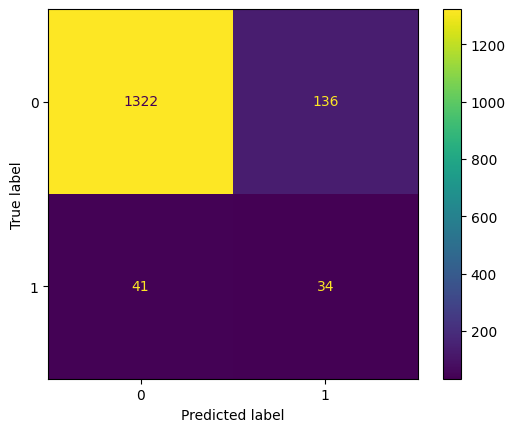

In [69]:
Y_pred = lrw.predict(X_te)  # first we get the model predictions
cm = confusion_matrix(Y_te, Y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

The correlation matrix tells us that 34 patients were correctly classified as having stroke, while a large amount was falsely classified as not having stroke.

However, we can see that false negative rate is reduced here as well to 136. Which is good,but still not a reliable "stroke detector"

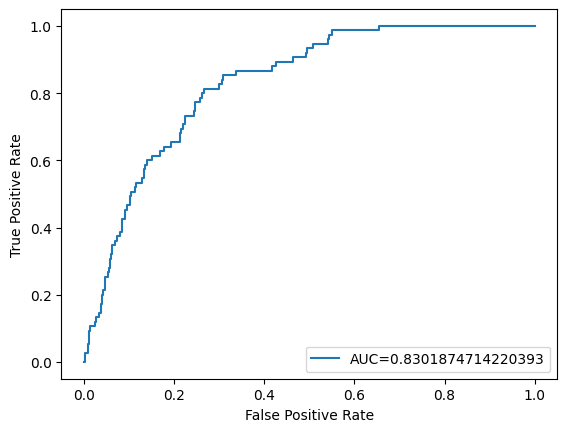

In [70]:
#define metrics
y_pred_proba = lrw.predict_proba(X_te)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_te,  y_pred_proba)
auc = metrics.roc_auc_score(Y_te, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

After trying out the inbuilt function of class weight = balanced. This approach seems to yield a higher f1 score for logistic regression.

Interestingly, grid searching over an array of differing class weightings for weighted logistic regression rises the f1 score up to 0.28 for positive class. Which is even larger than for "only" tweaking hyperparameters using all the models trained on resampled data before. But still, in a context of stroke prediction it is still not acceptable to have this many false negatives.

# Neural Network inspired by Kaggle

In [ ]:
# Define inputs
inputs = keras.Input(shape=(20,)) # amount of variables
a = layers.Dense(64, activation='relu')(inputs) # Rectified linear units activation function
x = layers.Dropout(0.7)(a)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.7)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.7)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.7)(x)
x = layers.concatenate([a, x])
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.7)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.7)(x)
output = layers.Dense(1, activation='sigmoid')(x) # output layer for binary classificaition (sigmoid function)

nn = keras.Model(inputs, output, name="ANN_predictor")
nn.summary()

In [137]:
from tensorflow.keras import layers, models #neural network architecture
from tensorflow.keras.callbacks import EarlyStopping #early stopping regularization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras #keras
import tensorflow as tf #tensorflow

from sklearn.metrics import accuracy_score, recall_score ,precision_score, f1_score #evaluate model

#compiles the model with Adam optimizer
nn.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
            loss='binary_crossentropy', metrics=['accuracy'])
early_stopper = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

#Trains the neural network
history = nn.fit(X_tr_smote, Y_tr_smote, epochs=1000, callbacks=[early_stopper], validation_data=(X_te, Y_te), verbose=0)

In [129]:
#Display the metrics of the neural network on the test set
test_preds = nn.predict(X_te)
threshold = 0.25
test_preds = [1. if i > threshold else 0. for i in test_preds]
test_acc = accuracy_score(Y_te, test_preds)
test_rec = recall_score(Y_te, test_preds)
test_pre = precision_score(Y_te, test_preds)
print('Test Set Metrics')
print('Model Accuracy:', test_acc)
print('Model Recall:', test_rec)
print('Model Precision:', test_pre)

48/48 [==============================] - 0s 2ms/step
Test Set Metrics
Model Accuracy: 0.6744944553163731
Model Recall: 0.88
Model Precision: 0.11870503597122302


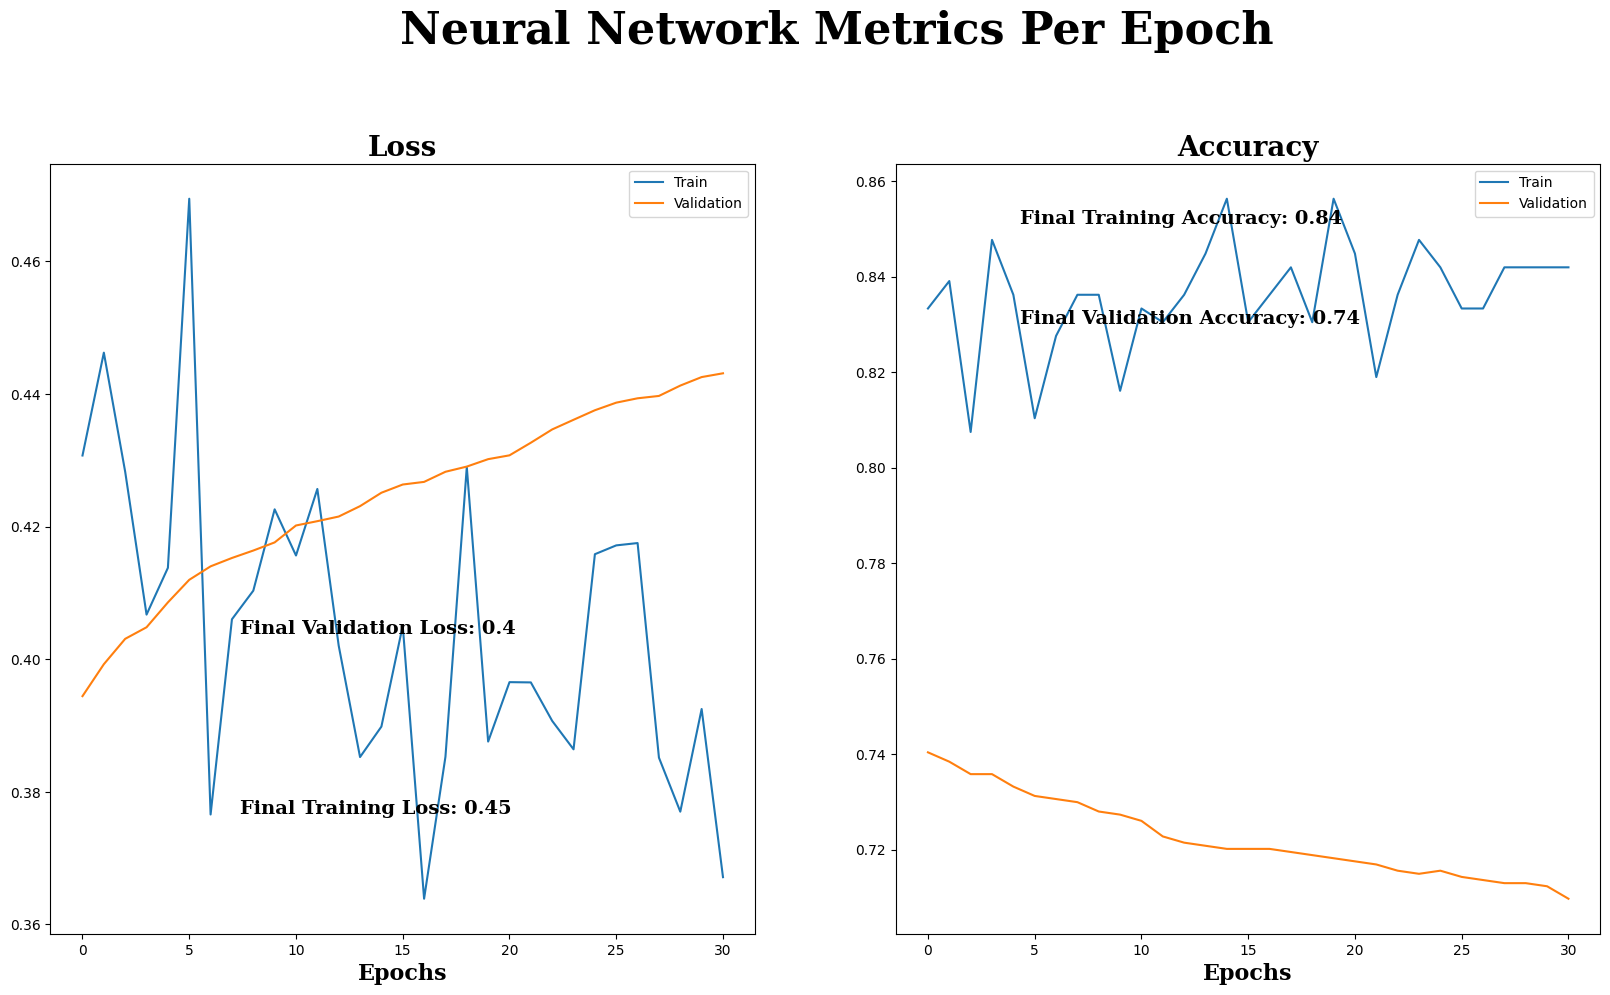

In [138]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']
min_val_loss = round(history.history['val_loss'][-30], 2)
min_train_loss = round(history.history['loss'][-30], 2)

val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
max_val_acc = round(history.history['val_accuracy'][-30], 2)
max_train_acc = round(history.history['accuracy'][-30], 2)

#plots the training vs validation loss and accuracy
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.set_title('Loss', {'font':'Serif', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel('Epochs', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.plot(train_loss, label='Train')
ax1.plot(val_loss, label='Validation')
ax1.legend()

fig.text(0.22, 0.23, 'Final Training Loss: ' + str(min_train_loss),
         {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'})
fig.text(0.22, 0.41, 'Final Validation Loss: ' + str(min_val_loss),
         {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'})

ax2.set_title('Accuracy', {'font':'Serif', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax2.set_xlabel('Epochs', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.plot(train_acc, label='Train')
ax2.plot(val_acc, label='Validation')
ax2.legend()

fig.text(0.61, 0.82, 'Final Training Accuracy: ' + str(max_train_acc),
         {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'})
fig.text(0.61, 0.72, 'Final Validation Accuracy: ' + str(max_val_acc),
         {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'})

fig.text(0.3,1, 'Neural Network Metrics Per Epoch', {'font':'Serif', 'fontsize':32,'fontweight':'bold', 'color':'black'})
plt.show()

In [131]:
#Display the metrics of the neural network on the test set
test_preds = nn.predict(X_te)
threshold = 0.25
test_preds = [1. if i > threshold else 0. for i in test_preds]
test_acc = accuracy_score(Y_te, test_preds)
test_rec = recall_score(Y_te, test_preds)
test_pre = precision_score(Y_te, test_preds)
print('Test Set Metrics')
print('Model Accuracy:', test_acc)
print('Model Recall:', test_rec)
print('Model Precision:', test_pre)

48/48 [==============================] - 0s 2ms/step
Test Set Metrics
Model Accuracy: 0.6744944553163731
Model Recall: 0.88
Model Precision: 0.11870503597122302


In [132]:
y_pred = nn.predict(X_te)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

48/48 [==============================] - 0s 2ms/step


In [133]:
cm = confusion_matrix(Y_te, y_pred_binary)


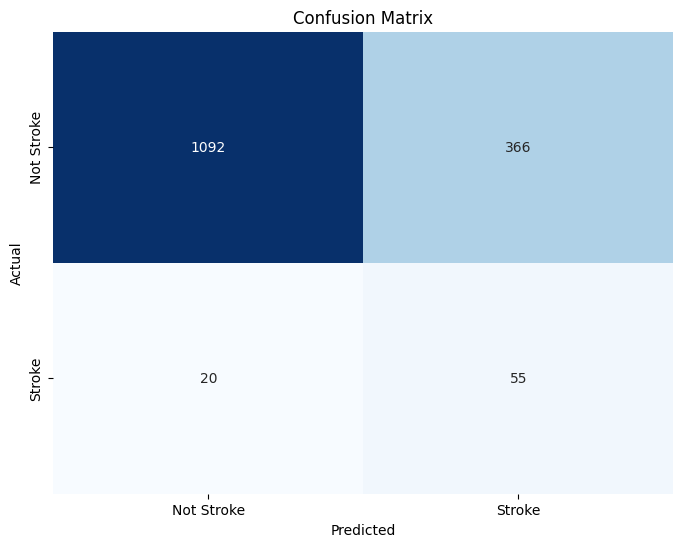

In [134]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Stroke", "Stroke"], yticklabels=["Not Stroke", "Stroke"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [135]:
accuracy = accuracy_score(Y_te, y_pred_binary)
precision = precision_score(Y_te, y_pred_binary)
recall = recall_score(Y_te, y_pred_binary)
f1 = f1_score(Y_te, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7482061317677756
Precision: 0.13064133016627077
Recall: 0.7333333333333333
F1-Score: 0.22177419354838707


This version of a neural network does not seem to improve the f1 score much. There are still many false negatives & too many false positives, that are not acceptable in a context of stroke.

# Correlation-based feature selection

The central hypothesis is that good feature sets contain features that are highly correlated with the target class, yet uncorrelated with each other. I decide here to remove all correlated variables passing a certain absolute value threshold. And after that train the models again on a set of selected variables.

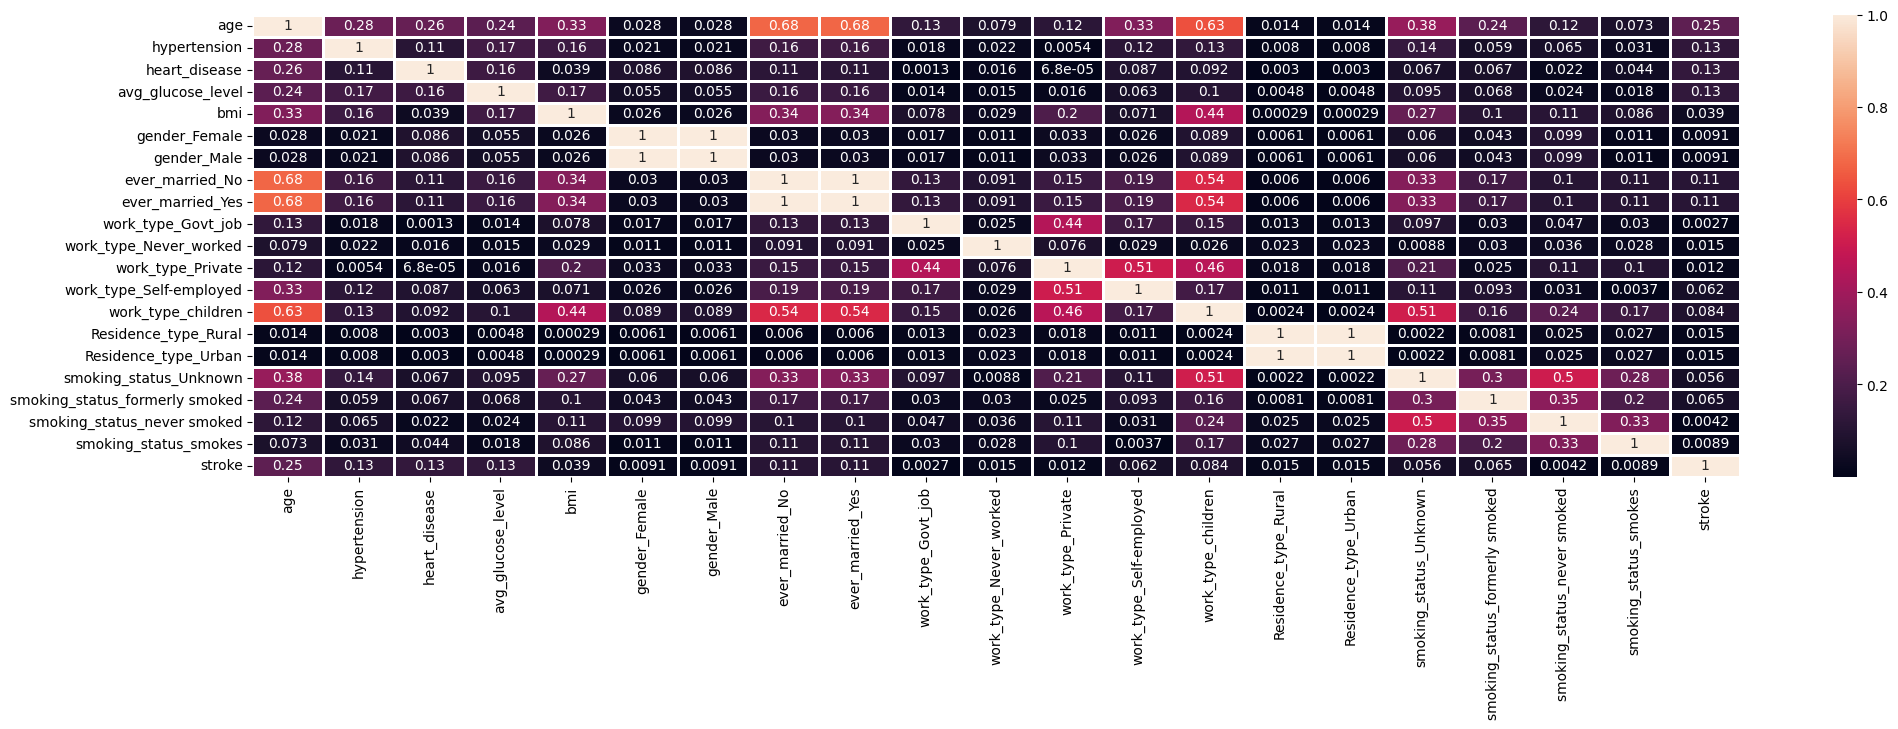

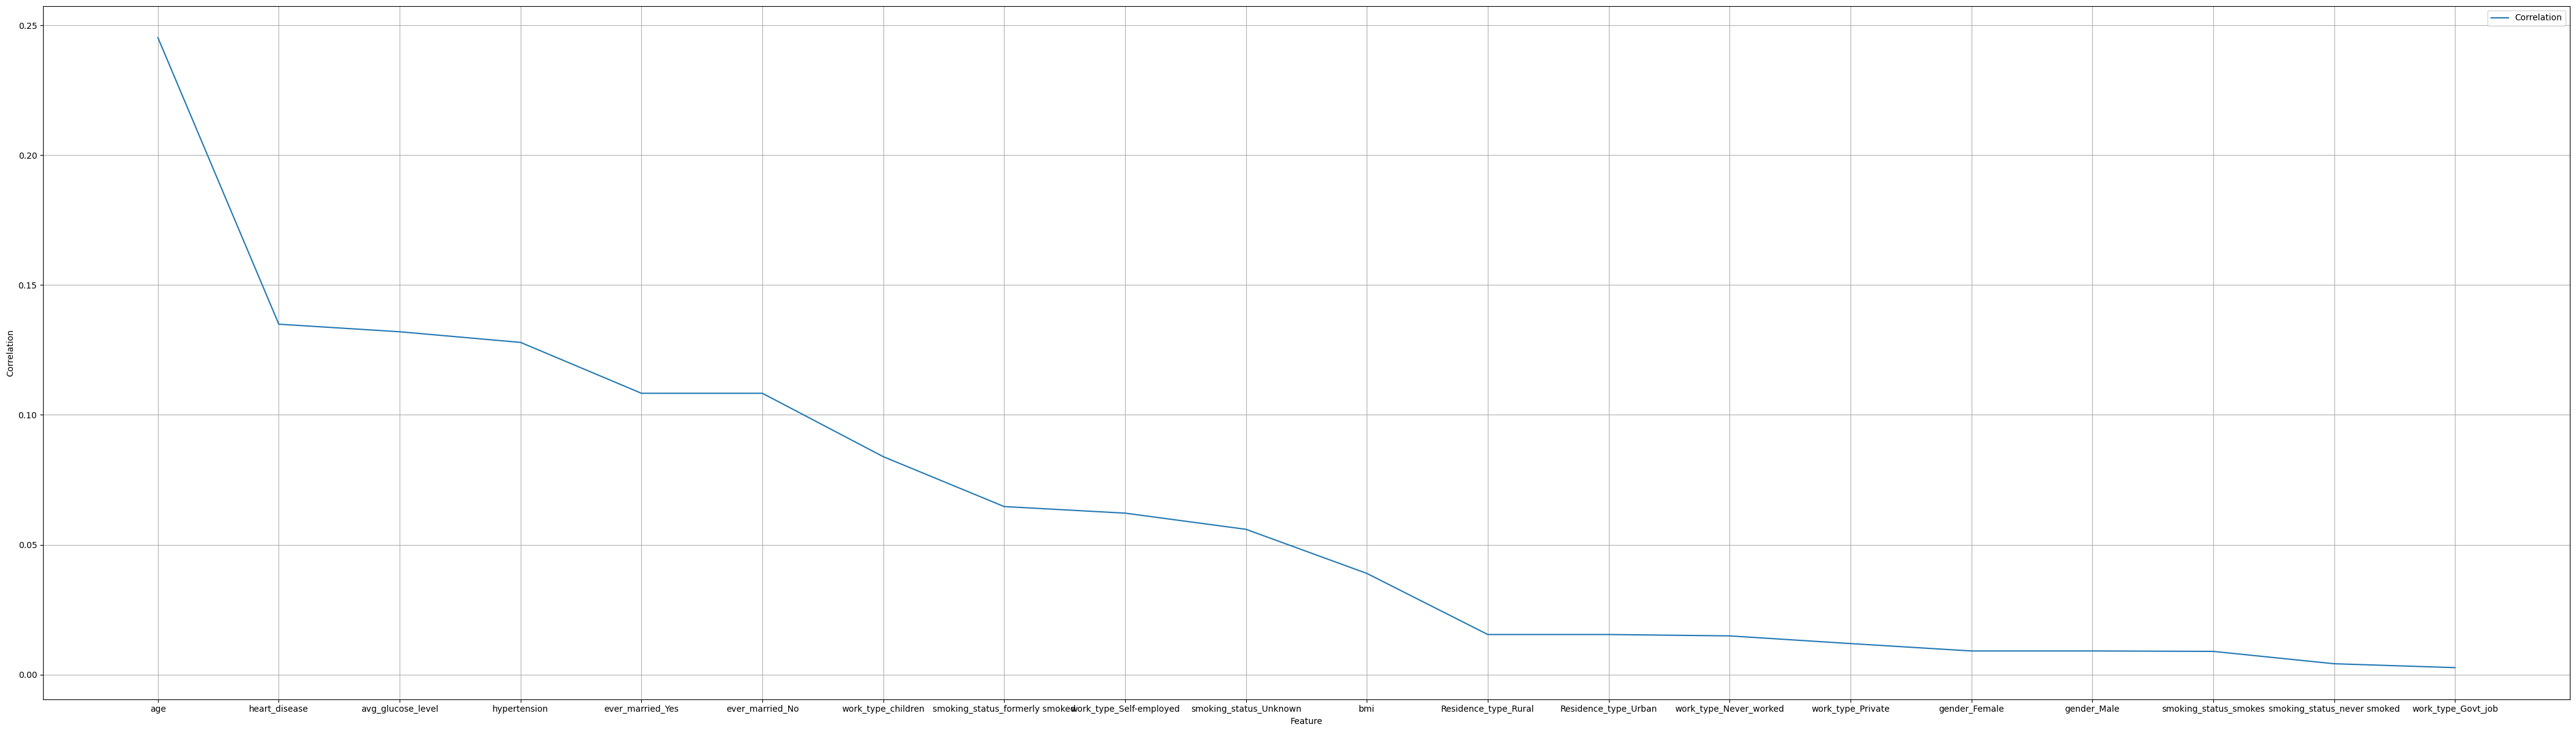

In [58]:
# check correlation
# Calculate correlation matrix and visualize as heatmap
plt.figure(figsize=(24,6))
corr=abs(df.corr())
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

# Plot feature correlations with target variable
plt.figure(figsize=(42,12))
plt.plot(corr["stroke"].sort_values(ascending=False)[1:],label="Correlation")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
# Define a function that takes the dataset and a threshold value as inputs and returns the set of all names of correlated columns
def correlation(dataset, threshold):
    # Empty set to store the names of correlated columns
    col_corr = set()

    # Calculate the correlation matrix for the dataset using the 'corr' function
    corr_matrix = dataset.corr()

    # Iterate over the columns of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the absolute value of the correlation coefficient is greater than the threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # If it is, add the name of the column to the set of correlated columns
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    # Return the set of correlated column names
    return col_corr

In [63]:
corr_features = correlation(df, 0.35)

In [64]:
X_corr = df.drop(corr_features,axis=1)
X_corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,work_type_Govt_job,work_type_Never_worked,Residence_type_Rural,smoking_status_formerly smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,0,0,0,0,1,0,1
1,61.0,0,0,202.21,28.9,1,0,0,1,0,0,1
2,80.0,0,1,105.92,32.5,0,0,0,1,0,0,1
3,49.0,0,0,171.23,34.4,1,0,0,0,0,1,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.9,1,0,0,0,0,0,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,0,0,0
5107,35.0,0,0,82.99,30.6,1,0,0,1,0,0,0
5108,51.0,0,0,166.29,25.6,0,0,0,1,1,0,0


In [67]:
# drop the 'Stroke' column from the DataFrame to create the feature matrix
X = df.drop('stroke', axis=1)
# create the target vector
y = df['stroke']
# split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_corr, y, test_size=0.3, stratify=y, random_state=42)

In [70]:
# Fit smote to training data and oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [72]:
# Train models
correduced_models = [
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("SVM (Linear Kernel)", SVC(kernel="linear")),
    ("SVM (RBF Kernel)", SVC(kernel="rbf", probability=True)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)),
    ("XGBoost", xgb.XGBClassifier())
]

results = []

for model_name, model in correduced_models:
    model.fit(X_train_smote, y_train_smote)
    Y_pred = model.predict(X_test)
    f1 = f1_score(y_test, Y_pred)
    accuracy_tr = model.score(X_train_smote, y_train_smote)
    accuracy_te = model.score(X_test, y_test)
# classification report
    classification_rep = classification_report(y_test, Y_pred, output_dict=True)
    precision_no_stroke = classification_rep['0']['precision']
    recall_no_stroke = classification_rep['0']['recall']
    f1_no_stroke = classification_rep['0']['f1-score']
    precision_stroke = classification_rep['1']['precision']
    recall_stroke = classification_rep['1']['recall']
    f1_stroke = classification_rep['1']['f1-score']

    results.append([
        model_name,
        accuracy_tr,
        accuracy_te,
        f1,
        precision_no_stroke,
        recall_no_stroke,
        f1_no_stroke,
        precision_stroke,
        recall_stroke,
        f1_stroke
    ])

columns = [
    "Model",
    "Train Accuracy",
    "Test Accuracy",
    "F1 Score",
    "Precision (no stroke)",
    "Recall (no stroke)",
    "F1 Score (no stroke)",
    "Precision (stroke)",
    "Recall (stroke)",
    "F1 Score (stroke)"
]

df = pd.DataFrame(results, columns=columns)
df = df.sort_values(by='F1 Score', ascending=False)

print(df.to_markdown(index=False))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


| Model               |   Train Accuracy |   Test Accuracy |   F1 Score |   Precision (no stroke) |   Recall (no stroke) |   F1 Score (no stroke) |   Precision (stroke) |   Recall (stroke) |   F1 Score (stroke) |
|:--------------------|-----------------:|----------------:|-----------:|------------------------:|---------------------:|-----------------------:|---------------------:|------------------:|--------------------:|
| Logistic Regression |         1        |        1        |   1        |                1        |             1        |               1        |             1        |          1        |            1        |
| SVM (Linear Kernel) |         1        |        1        |   1        |                1        |             1        |               1        |             1        |          1        |            1        |
| Decision Tree       |         1        |        1        |   1        |                1        |             1        |               1        | 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


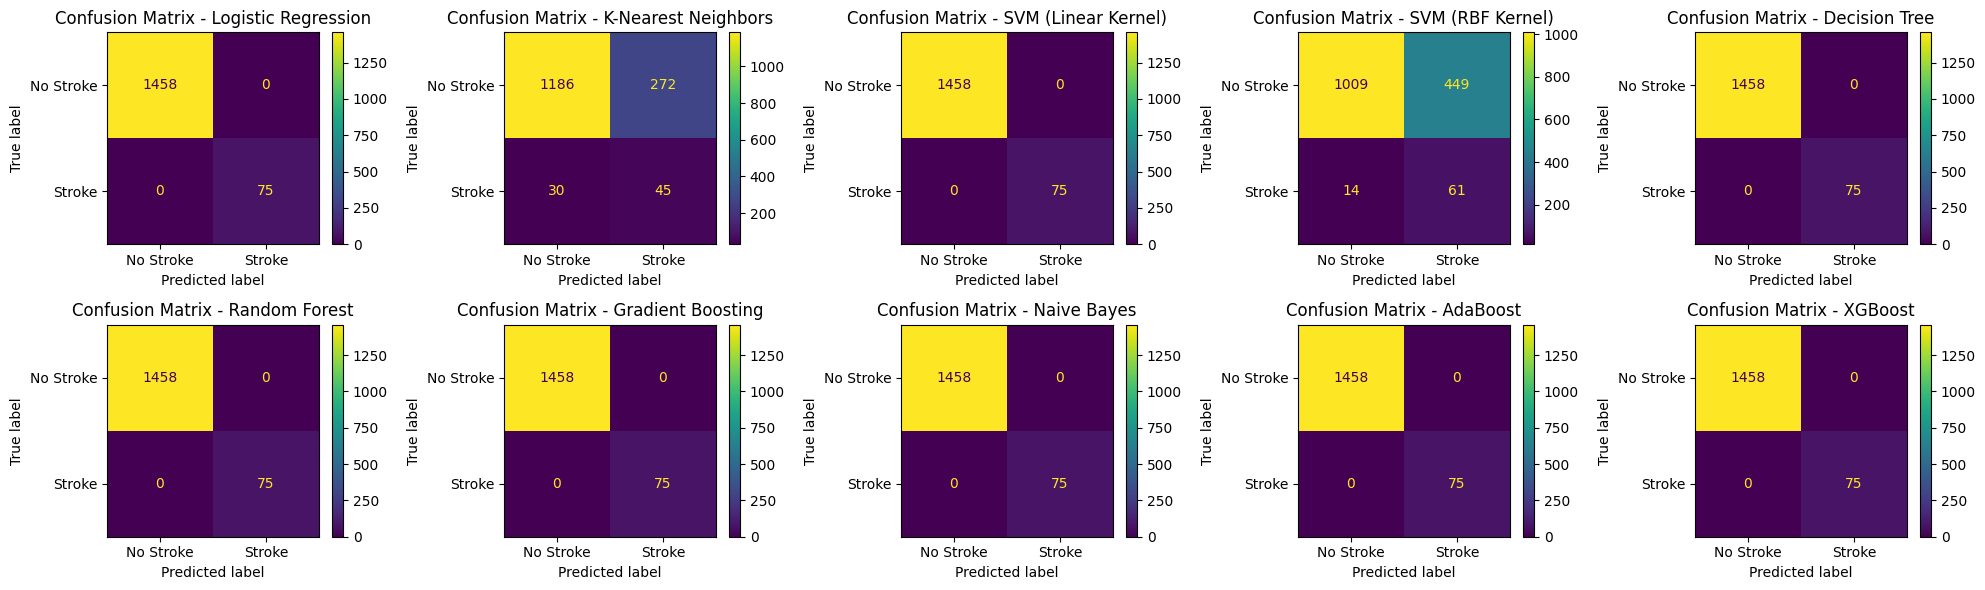

In [79]:
# Confusion matrices:
fig, axes = plt.subplots(2, 5,figsize=(20, 6))
axes = axes.ravel()

for idx, (model_name, model) in enumerate(correduced_models):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, Y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
    disp.plot(ax=axes[idx])
    disp.ax_.set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()

e.g  Logistic regression is perfectly able to classify all patients as having stroke vs. not having stroke. The same goes for correctly classifiying healthy people as not having stroke vs. having stroke.

By removing the highly correlated independent variables , I have increased the overall performance of my models up to 100% accuracy/ f1 =1.

However, one could argue that theoretically deleting variables makes it easier for the model to detect patterns in the data and a model should be able to handle multicollinearity and disentangle predictors.

Nonetheless, I do not see why in a real life context in stroke prediction one could simply feed the model with only the relevant "highly predictive" variables. Practically a model being able to detect stroke using less variables as expected is still a clinically useful model. (Spirit of occams razor)